In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from astropy.table import Table

### Load data

In [254]:
!ls -lt /local/scratch_2/jls/*input.hdf5

-rw-r--r-- 1 jls jls 1910500122 Aug  8 12:56 /local/scratch_2/jls/LAMOST_input.hdf5
-rw-r--r-- 1 jls jls  367687391 Aug  8 12:46 /local/scratch_2/jls/RAVEON_input.hdf5
-rw-r--r-- 1 jls jls   65819096 Aug  8 12:34 /local/scratch_2/jls/SEGUE_input.hdf5
-rw-r--r-- 1 jls jls  367687391 Aug  8 12:31 /local/scratch_2/jls/RAVE_input.hdf5
-rw-r--r-- 1 jls jls   28383664 Aug  8 12:17 /local/scratch_2/jls/GES_input.hdf5
-rw-r--r-- 1 jls jls  384872816 Aug  8 12:12 /local/scratch_2/jls/GALAH_input.hdf5
-rw-r--r-- 1 jls jls  144735734 Aug  8 09:40 /local/scratch_2/jls/APOGEE_input.hdf5


In [229]:
!ls -lt /data/jls/GaiaDR2/spectro/*input.hdf5

-rw-r--r-- 1 jls jls   74426502 May 24 11:10 /data/jls/GaiaDR2/spectro/SEGUE_input.hdf5
-rw-r--r-- 1 jls jls 2757976275 May  9 19:36 /data/jls/GaiaDR2/spectro/LAMOST_input.hdf5
-rw-r--r-- 1 jls jls   27595184 May  4 12:42 /data/jls/GaiaDR2/spectro/GES_input.hdf5
-rw-r--r-- 1 jls jls  374589436 May  2 17:38 /data/jls/GaiaDR2/spectro/GALAH_input.hdf5
-rw-r--r-- 1 jls jls  572538337 Apr 27 17:16 /data/jls/GaiaDR2/spectro/RAVEON_input.hdf5
-rw-r--r-- 1 jls jls  572538337 Apr 27 17:15 /data/jls/GaiaDR2/spectro/RAVE_input.hdf5
-rw-r--r-- 1 jls jls  283302786 Apr 26 20:52 /data/jls/GaiaDR2/spectro/GES_iDR4_input.hdf5
-rw-r--r-- 1 jls jls  129743146 Apr 26 12:15 /data/jls/GaiaDR2/spectro/APOGEE_input.hdf5


In [230]:
!ls -lt /data/jls/GaiaDR2/spectro/*input_pm.hdf5

-rw-r--r-- 1 jls jls   4726806 May 18 10:23 /data/jls/GaiaDR2/spectro/LAMOST_input_pm.hdf5
-rw-r--r-- 1 jls jls 355851062 May 10 10:34 /data/jls/GaiaDR2/spectro/RAVE_input_pm.hdf5
-rw-r--r-- 1 jls jls   1159666 May  5 09:58 /data/jls/GaiaDR2/spectro/GES_input_pm.hdf5
-rw-r--r-- 1 jls jls   2502660 May  4 23:09 /data/jls/GaiaDR2/spectro/RAVEON_input_pm.hdf5
-rw-r--r-- 1 jls jls   1617432 May  4 22:09 /data/jls/GaiaDR2/spectro/APOGEE_input_pm.hdf5
-rw-r--r-- 1 jls jls   1643808 May  4 21:26 /data/jls/GaiaDR2/spectro/GALAH_input_pm.hdf5


In [3]:
apogee = Table.read('/data/jls/GaiaDR2/spectro/APOGEE_distances_withPRIOR_MASTER.hdf5')
apogee_inputs = pd.read_hdf('/data/jls/GaiaDR2/spectro/APOGEE_input_MASTER.hdf5')
print 'Processed:',np.count_nonzero(apogee['flag']==0.), 'out of', len(apogee)
rave = Table.read('/data/jls/GaiaDR2/spectro/RAVE_DR5_distances_withPRIOR_MASTER.hdf5')
rave_inputs = pd.read_hdf('/data/jls/GaiaDR2/spectro/RAVE_input_MASTER.hdf5')
print 'Processed:',np.count_nonzero(rave['flag']==0.), 'out of', len(rave)
ges = Table.read('/data/jls/GaiaDR2/spectro/GES_DR3_distances_withPRIOR_MASTER.hdf5')
ges_inputs = pd.read_hdf('/data/jls/GaiaDR2/spectro/GES_input_MASTER.hdf5')
print 'Processed:',np.count_nonzero(ges['flag']==0.), 'out of', len(ges)
galah = Table.read('/data/jls/GaiaDR2/spectro/GALAH_distances_withPRIOR_MASTER.hdf5')
galah_inputs = pd.read_hdf('/data/jls/GaiaDR2/spectro/GALAH_input_MASTER.hdf5')
print 'Processed:',np.count_nonzero(galah['flag']==0.), 'out of', len(galah)
lamost = Table.read('/data/jls/GaiaDR2/spectro/LAMOST_distances_withPRIOR_MASTER.hdf5')
lamost_inputs = pd.read_hdf('/data/jls/GaiaDR2/spectro/LAMOST_input_MASTER.hdf5')
print 'Processed:',np.count_nonzero(lamost['flag']==0.), 'out of', len(lamost)
raveON = Table.read('/data/jls/GaiaDR2/spectro/RAVE_Cannon_distances_withPRIOR_MASTER.hdf5')
raveON_inputs = pd.read_hdf('/data/jls/GaiaDR2/spectro/RAVEON_input_MASTER.hdf5')
print 'Processed:',np.count_nonzero(raveON['flag']==0.), 'out of', len(raveON)

from astropy.table import Table, vstack, join

def flag_errors(data, covar_correction=True):
    for col in ['dist_err', 'par_err', 'dm_err',
                'log10_teff_err', 'logg_err', 'log10_av_err',
                'log10_age_err',
                'mass_err',
                'Z_err', 'dm_log10age_corr', 'log10age_Z_corr', 'dm_Z_corr']:
        data['flag'][(data['flag'] == 0) & (data[col] != data[col])] = 6
        data['flag'][(data['flag'] == 0) & (data[col] == 0.)] = 6
    data['flag'][(data['log10_age'] < -1)&(data['logg']>3.5)&(data['log10_teff']<3.9)] = 7
    for col in ['dm_log10age_corr', 'log10age_Z_corr', 'dm_Z_corr']:
        data['flag'][(data['flag'] == 0) & (np.abs(data[col]) > 1.)] = 6
    return data

def fillin(r, rfill, fld):
    r['indx'] = np.arange(len(r))
    rfill['indx'] = np.arange(len(rfill))
    r2 = join(r[[fld, 'indx']],
              rfill[[fld, 'indx']],
              keys=fld, join_type='left')
    r[r2['indx_1'][~r2['indx_2'].mask]] = \
        rfill[r2['indx_2'][~r2['indx_2'].mask]]
    r.remove_column('indx')
    return r

segue = Table.read('/data/jls/GaiaDR2/spectro/SEGUE_distances_withPRIOR_MASTER.hdf5')
rfill = Table.read(
       '/data/jls/GaiaDR2/spectro/SEGUE_distances_withPRIOR_parallax_fillin.hdf5')
rfill = flag_errors(rfill)
segue = fillin(segue, rfill, 'specobjid')
segue_inputs = pd.read_hdf('/data/jls/GaiaDR2/spectro/SEGUE_input_MASTER.hdf5')
print 'Processed:',np.count_nonzero(segue['flag']==0.), 'out of', len(segue)

/home/jls/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Processed: 203417 out of 258475
Processed: 415200 out of 457555
Processed: 10882 out of 25332
Processed: 260233 out of 342682


/data/jls/python2.7/site-packages/tables/path.py:118: NaturalNameWarning: object name is a Python keyword: 'class'; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  % (name, _warnInfo), NaturalNameWarning)


Processed: 2861310 out of 3177995
Processed: 376316 out of 457555


/home/jls/.local/lib/python2.7/site-packages/astropy/table/column.py:954: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)
/home/jls/.local/lib/python2.7/site-packages/astropy/table/column.py:954: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


Processed: 182132 out of 187152


In [317]:
joint = pd.concat([ges.to_pandas(),raveON.to_pandas(),
                   galah.to_pandas(),apogee.to_pandas(),
                   lamost.to_pandas(),segue.to_pandas()],axis=0,sort=False)

jointinputs = pd.concat([ges_inputs,raveON_inputs,
                   galah_inputs,apogee_inputs,
                   lamost_inputs,segue_inputs],axis=0,sort=False)

joint_table = Table.read('/home/jls/public_html/data/gaia_spectro.hdf5')
joint_table['age']=np.power(10.,joint_table['log10_age'])
joint['age']=np.power(10.,joint['log10_age'])

In [328]:
print len(joint), len(jointinputs)

4449191 4449191


In [329]:
print len(joint_table)
print len(rave)+len(raveON)+len(galah)+len(apogee)+len(segue)+len(ges)+len(lamost)

4906746
4906746


### Summarise properties

In [330]:
joint_table.meta['COMMENT']

['Distances, ages, masses and extinctions for spectroscopic surveys combined with Gaia DR2',
 'Isochrone set(s) used = PARSEC version 1.2S eta=0.2 http://stev.oapd.inaf.it/cgi-bin/cmd',
 'Adopted prior: 2018 prior described in Sanders et al. (2018)',
 'survey is a string giving the name of the survey the star was taken from -- APOGEE, GALAH, GES, RAVEON, RAVEDR5, LAMOST, SEGUE',
 'CNAME is the unique identifier for the GES survey',
 'sobject_id is the unique identifier for the GALAH survey',
 'APOGEE_ID is the unique identifier for the APOGEE survey',
 'raveid is the unique identifier for the RAVE Cannon survey',
 'raveid is the unique identifier for the RAVE DR5 survey',
 'obsid is the unique identifier for the LAMOST survey',
 'ra,dec are the equatorial coordinates from the spectroscopic surveys (in degrees) -- we use the spectroscopic survey ra,dec instead of Gaia ra,dec so cross-match failures with Gaia still have values.',
 'angular_separation is the cross-match distance in arcsec

In [297]:
surveys = ['Survey','RAVE','RAVEON','GALAH','APOGEE','LAMOST','GES','SEGUE','All','All no dupl.']
total_processed = ['Total', len(rave), len(raveON), len(galah), len(apogee), len(lamost), 
                   len(ges), len(segue), len(joint_table), np.count_nonzero(joint_table['duplicated']==0)]
matches = ['Gaia matches',np.count_nonzero(rave['source_id']>0.), 
           np.count_nonzero(raveON['source_id']>0.), 
           np.count_nonzero(galah['source_id']>0.), 
           np.count_nonzero(apogee['source_id']>0.), 
           np.count_nonzero(lamost['source_id']>0.), 
           np.count_nonzero(ges['source_id']>0.), 
           np.count_nonzero(segue['source_id']>0.), 
           np.count_nonzero(joint_table['source_id']>0.), np.count_nonzero(joint_table['duplicated']==0)]
successes = ['Success (0)',np.count_nonzero(rave['flag']==0), 
           np.count_nonzero(raveON['flag']==0), 
           np.count_nonzero(galah['flag']==0), 
           np.count_nonzero(apogee['flag']==0), 
           np.count_nonzero(lamost['flag']==0), 
           np.count_nonzero(ges['flag']==0),
           np.count_nonzero(segue['flag']==0),
            np.count_nonzero(joint_table['flag']==0), 
             np.count_nonzero((joint_table['duplicated']==0)&(joint_table['flag']==0))]

pipeline = ['Pipeline failed (1)',np.count_nonzero(rave['flag']==1), 
           np.count_nonzero(raveON['flag']==1), 
           np.count_nonzero(galah['flag']==1), 
           np.count_nonzero(apogee['flag']==1), 
           np.count_nonzero(lamost['flag']==1), 
           np.count_nonzero(ges['flag']==1),
           np.count_nonzero(segue['flag']==1),
            np.count_nonzero(joint_table['flag']==1), 
             np.count_nonzero((joint_table['duplicated']==0)&(joint_table['flag']==1))]

spec_problem = ['Spec. problem (2)',np.count_nonzero(rave['flag']==2), 
           np.count_nonzero(raveON['flag']==2), 
           np.count_nonzero(galah['flag']==2), 
           np.count_nonzero(apogee['flag']==2), 
           np.count_nonzero(lamost['flag']==2), 
           np.count_nonzero(ges['flag']==2),
           np.count_nonzero(segue['flag']==2),
            np.count_nonzero(joint_table['flag']==2), 
             np.count_nonzero((joint_table['duplicated']==0)&(joint_table['flag']==2))]

phot_problem = ['Phot. problem (3)',np.count_nonzero(rave['flag']==3), 
           np.count_nonzero(raveON['flag']==3), 
           np.count_nonzero(galah['flag']==3), 
           np.count_nonzero(apogee['flag']==3), 
           np.count_nonzero(lamost['flag']==3), 
           np.count_nonzero(ges['flag']==3), 
           np.count_nonzero(segue['flag']==3),
            np.count_nonzero(joint_table['flag']==3), 
             np.count_nonzero((joint_table['duplicated']==0)&(joint_table['flag']==3))]


unreliable_errors = ['Unreliable errors (6)',np.count_nonzero(rave['flag']==6), 
           np.count_nonzero(raveON['flag']==6), 
           np.count_nonzero(galah['flag']==6), 
           np.count_nonzero(apogee['flag']==6), 
           np.count_nonzero(lamost['flag']==6), 
           np.count_nonzero(ges['flag']==6),
           np.count_nonzero(segue['flag']==6),
            np.count_nonzero(joint_table['flag']==6), 
             np.count_nonzero((joint_table['duplicated']==0)&(joint_table['flag']==6))]

low_age = ['Low age (7)',np.count_nonzero(rave['flag']==7), 
           np.count_nonzero(raveON['flag']==7), 
           np.count_nonzero(galah['flag']==7), 
           np.count_nonzero(apogee['flag']==7), 
           np.count_nonzero(lamost['flag']==7), 
           np.count_nonzero(ges['flag']==7),
           np.count_nonzero(segue['flag']==7),
            np.count_nonzero(joint_table['flag']==7), 
             np.count_nonzero((joint_table['duplicated']==0)&(joint_table['flag']==7))]


successesG = ['Success with Gaia',np.count_nonzero((rave['flag']==0)&(rave['source_id']>0)), 
           np.count_nonzero((raveON['flag']==0)&(raveON['source_id']>0)), 
           np.count_nonzero((galah['flag']==0)&(galah['source_id']>0)), 
           np.count_nonzero((apogee['flag']==0)&(apogee['source_id']>0)), 
           np.count_nonzero((lamost['flag']==0)&(lamost['source_id']>0)), 
           np.count_nonzero((ges['flag']==0)&(ges['source_id']>0)), 
           np.count_nonzero((segue['flag']==0)&(segue['source_id']>0)), 
           np.count_nonzero((joint_table['flag']==0)&(joint_table['source_id']>0)), 
             np.count_nonzero((joint_table['duplicated']==0)&(joint_table['flag']==0))]
import tabulate
tab = tabulate.tabulate([surveys, total_processed, matches, 
                         successes, pipeline, spec_problem, phot_problem, 
                         unreliable_errors, low_age, successesG],tablefmt='latex')
with open('table.dat', 'w') as f:
    f.write(tab)

In [298]:
!head -20 table.dat

\begin{tabular}{llllllllll}
\hline
 Survey                & RAVE   & RAVEON & GALAH  & APOGEE & LAMOST  & GES   & SEGUE  & All     & All no dupl. \\
 Total                 & 457555 & 457555 & 342682 & 258475 & 3177995 & 25332 & 187152 & 4906746 & 3528750      \\
 Gaia matches          & 456353 & 456353 & 342212 & 256851 & 3168545 & 25313 & 187100 & 4705627 & 3528750      \\
 Success (0)           & 415200 & 376316 & 260233 & 203417 & 2861310 & 10882 & 182132 & 4309490 & 3144550      \\
 Pipeline failed (1)   & 1358   & 368    & 67     & 2778   & 15503   & 105   & 393    & 20572   & 16598        \\
 Spec. problem (2)     & 20602  & 67439  & 78455  & 42553  & 67524   & 12513 & 0      & 289086  & 185098       \\
 Phot. problem (3)     & 498    & 498    & 0      & 810    & 7660    & 1181  & 1490   & 12137   & 3231         \\
 Unreliable errors (6) & 3220   & 1093   & 46     & 460    & 7948    & 52    & 72     & 12891   & 6377         \\
 Low age (7)           & 16677  & 11841  & 3881   & 8

/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jls/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:991: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys


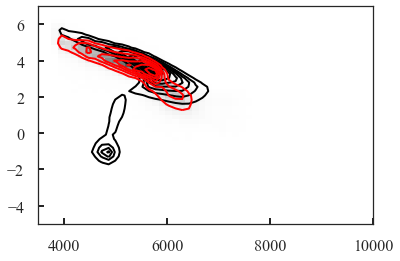

In [58]:
from matplotlib.colors import LogNorm
n=plt.hist2d(lamost_inputs['teff'][lamost['flag']==0],
           (lamost_inputs['J']-5.*np.log10(100./lamost_inputs['parallax']))[lamost['flag']==0],
           range=[[3500.,10000.],[-5.,7.]],bins=50);
plt.contour(.5*(n[1][1:]+n[1][:-1]),.5*(n[2][1:]+n[2][:-1]),n[0].T,colors='k')
n=plt.hist2d(lamost_inputs['teff'][lamost['flag']==7],
           (lamost_inputs['J']-5.*np.log10(100./lamost_inputs['parallax']))[lamost['flag']==7],
           range=[[3500.,10000.],[-5.,7.]],bins=50);
plt.contour(.5*(n[1][1:]+n[1][:-1]),.5*(n[2][1:]+n[2][:-1]),n[0].T,colors='r')

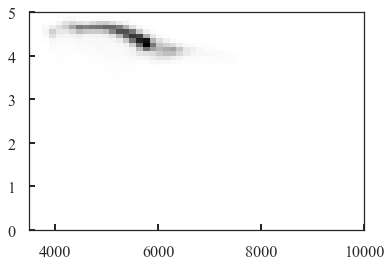

In [59]:
plt.hist2d(lamost_inputs['teff'][lamost['flag']==7],
           lamost_inputs['logg'][lamost['flag']==7],
           range=[[3500.,10000.],[0.,5.]],bins=50);

### Survey footprints

In [330]:
import matplotlib
import healpy as hp
def gen_fast_map_survey(data, i,nside=64):
    b = np.rad2deg(data['b'])
    l = np.rad2deg(data['l'])
    fltr = (b>-90.)&(b<90.)
    l=l[fltr]
    b=b[fltr]
    ip_ = hp.ang2pix(nside, l, b, lonlat=True)
    npixel  = hp.nside2npix(nside)
    map_ = 1.*np.bincount(ip_,minlength=npixel)
    map_[map_>=1]=1
    map_[map_==0]=np.nan
#     cm=[plt.cm.Reds,
#         plt.cm.Blues,
#         plt.cm.Greens,
#         plt.cm.Purples][i]
    colors = [sns.color_palette()[4],
             sns.color_palette()[1],
             sns.color_palette()[3],
             sns.color_palette()[2],
             sns.color_palette()[0],
             sns.color_palette()[5]]
    alphas = [0.8,0.8,0.8,1.,1.,1.]
    colors=np.array([[colors[j][0],colors[j][1],colors[j][2],alphas[j]] for j in range(6)])
    cm = [matplotlib.colors.ListedColormap(([[0.,0.,0,0.0],
                                             colors[j]])) for j in range(6)][i]
    hp.visufunc.mollview(map_,fig=0,
                         title='',unit='',cmap=cm,cbar=False,min=0.,max=1.)

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


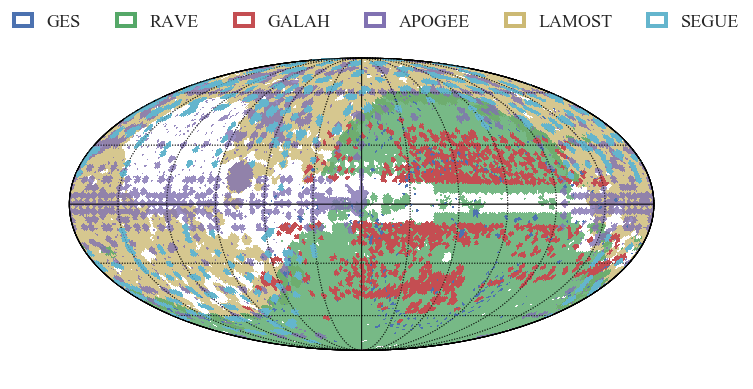

In [12]:
for i,a in enumerate([lamost,rave,apogee,galah,ges,segue]):
    gen_fast_map_survey(a,i)
hp.graticule(alpha=0.3)

from matplotlib.patches import Rectangle

handles = [Rectangle((0,0),1,1,color="none",ec=c,lw=4) for c in sns.color_palette()]
labels= ["GES","RAVE","GALAH","APOGEE","LAMOST","SEGUE"]
plt.legend(handles, labels, handlelength=1, ncol=6,bbox_to_anchor=(1.17,1.2))
plt.savefig('onsky.pdf',bbox_inches='tight')

### Binary stars

In [60]:
g = np.genfromtxt('/data/jls/isochrones/PARSEC_Gaia/grid/gaia_0.003.dat')
gJ = np.genfromtxt('/data/jls/isochrones/PARSEC_Gaia/grid/2mass_spitzer_wise_0.003.dat')
!head -15 /data/jls/isochrones/PARSEC_Gaia/grid/gaia_0.003.dat
!head -15 /data/jls/isochrones/PARSEC_Gaia/grid/2mass_spitzer_wise_0.003.dat

# File generated by CMD 3.0 (http://stev.oapd.inaf.it/cmd) on Mon Mar 19 16:49:29 CET 2018
# PARSEC isochrones, release v1.2S
# Basic references: Bressan et al. (2012), MNRAS, 427, 127 + Chen et al. (2014, 2015), MNRAS, 444, 2525 + MNRAS, 452, 1068 + Tang et al. (2014), MNRAS, 445, 4287
# Warning: you choose not to include the TP-AGB phase!
# Photometric system: Gaia's DR2 G, G_BP and G_RP (Vegamags)
# Using NBC version of bolometric corrections as in Chen et al. (2014), MNRAS, 444, 2525
# BCs of Carbon stars derive from Aringer et al. (2009, A&A 503, 913)
# O-rich circumstellar dpmod60alox40 dust from Groenewegen (2006)
# C-rich circumstellar AMCSIC15 dust from Groenewegen (2006)
# IMF: Chabrier (2001) lognormal 
# On RGB, assumed Reimers mass loss with efficiency eta=0.2
# Kind of output: isochrone tables
#	Isochrone  Z = 0.01479	Y = 0.27470	[M/H] = 0.003	eta_R = 0.200	Age = 	3.9811e+06 yr
#      Z	log(age/yr)	M_ini   	M_act	logL/Lo	logTe	logG	mbol    G       G_BP    G_RP	int_IMF	sta

/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


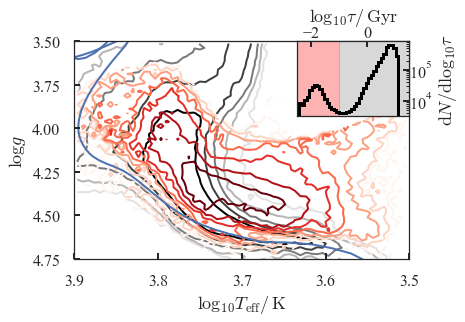

In [61]:
from matplotlib.colors import LogNorm
H=plt.hist2d(joint['log10_teff'][(joint['flag']==0)],
           joint['logg'][(joint['flag']==0)],
           bins=60,range=[[3.5,3.9],[3.5,5.]],
           norm=LogNorm(),
            );
H2=plt.hist2d(joint['log10_teff'][(joint['flag']==7)],
           joint['logg'][(joint['flag']==7)],
           bins=60,range=[[3.5,3.9],[3.5,5.]],
           norm=LogNorm(),
           cmap=plt.cm.viridis
          );
plt.clf()
plt.contour(.5*(H[1][1:]+H[1][:-1]),.5*(H[2][1:]+H[2][:-1]),np.log10(H[0]).T)
plt.contour(.5*(H2[1][1:]+H2[1][:-1]),.5*(H2[2][1:]+H2[2][:-1]),np.log10(H2[0]).T,cmap=plt.cm.Reds)
plt.xlim(3.9,3.5)
plt.ylim(4.75,3.5)
plt.xlabel(r'$\log_{10}T_\mathrm{eff}/\,\mathrm{K}$')
plt.ylabel(r'$\log g$')
plt.plot(g.T[5][g.T[1]==9.],g.T[6][g.T[1]==9.])
plt.axes([0.64,0.62,0.26,0.26])
plt.axvspan(-3,-1, alpha=0.3, color='red')
plt.axvspan(-1,2, alpha=0.3, color='gray')
plt.xlim(-2.5,1.5)

plt.hist(joint['log10_age'][(joint['flag']==0)|(joint['flag']==7)],histtype='step',lw=3,bins=40,color='k');
plt.xlabel(r'$\log_{10}\tau/\,\mathrm{Gyr}$')
plt.ylabel(r'$\mathrm{d}N/\mathrm{d}\log_{10}\tau$')
plt.gca().xaxis.tick_top()
plt.gca().yaxis.tick_right()
plt.gca().xaxis.set_label_position('top') 
plt.gca().yaxis.set_label_position('right') 
plt.gca().tick_params(axis='both', which='major', pad=0)
plt.semilogy()
plt.savefig('age_binary.pdf', bbox_inches='tight')

In [15]:
from matplotlib.colors import LogNorm
H=plt.hist2d((jointinputs['J']-jointinputs['K'])[(joint['flag']==0)&(jointinputs['parallax_error']/jointinputs['parallax']<0.1)],
           (jointinputs['G']-5.*np.log10(100./jointinputs['parallax']))[(joint['flag']==0)&(jointinputs['parallax_error']/jointinputs['parallax']<0.1)],
           bins=60,range=[[0.,1.5],[3.,8.]],
#            norm=LogNorm(),
            );
H2=plt.hist2d((jointinputs['J']-jointinputs['K'])[(joint['flag']==7)&(jointinputs['parallax_error']/jointinputs['parallax']<0.1)],
           (jointinputs['G']-5.*np.log10(100./jointinputs['parallax']))[(joint['flag']==7)&(jointinputs['parallax_error']/jointinputs['parallax']<0.1)],
           bins=60,range=[[0.,1.5],[3.,8.]],
#            norm=LogNorm(),
            );
plt.clf()
plt.contour(.5*(H[1][1:]+H[1][:-1]),.5*(H[2][1:]+H[2][:-1]),H[0].T)#np.log10(H[0]).T)
plt.contour(.5*(H2[1][1:]+H2[1][:-1]),.5*(H2[2][1:]+H2[2][:-1]),H2[0].T,cmap=plt.cm.Reds)#np.log10(H2[0]).T,cmap=plt.cm.Reds)
plt.xlim(0.2,1.)
plt.ylim(7.5,3.)
# plt.xlabel(r'$\log_{10}T_\mathrm{eff}/\,\mathrm{K}$')
# plt.ylabel(r'$\log g$')
g= np.genfromtxt('/data/jls/isochrones/PARSEC_Gaia/grid/gaia_0.588.dat')
g2= np.genfromtxt('/data/jls/isochrones/PARSEC_Gaia/grid/2mass_spitzer_wise_0.588.dat')

plt.plot((g2.T[8]-g2.T[10])[g.T[1]==9.],g.T[8][g.T[1]==9.])
plt.axes([0.64,0.62,0.26,0.26])
plt.axvspan(-3,-1, alpha=0.3, color='red')
plt.axvspan(-1,2, alpha=0.3, color='gray')
plt.xlim(-2.5,1.5)

plt.hist(joint['log10_age'][(joint['flag']==0)|(joint['flag']==7)],histtype='step',lw=3,bins=40,color='k');
plt.xlabel(r'$\log_{10}\tau/\,\mathrm{Gyr}$')
plt.ylabel(r'$\mathrm{d}N/\mathrm{d}\log_{10}\tau$')
plt.gca().xaxis.tick_top()
plt.gca().yaxis.tick_right()
plt.gca().xaxis.set_label_position('top') 
plt.gca().yaxis.set_label_position('right') 
plt.gca().tick_params(axis='both', which='major', pad=0)
plt.semilogy()
# plt.savefig('age_binary.pdf', bbox_inches='tight')

ValueError: cannot reindex from a duplicate axis

### Input/Output teff,logg,Z

In [41]:
plt.hexbin?

In [62]:
def input_output(inputs, data, a, title, axis_labels=False):
    fltr = data['flag']==0
    fltr &= data['log10_age']>-1.
    plt.sca(a[0])
#     plt.scatter(np.log10(inputs['teff'][fltr]),inputs['logg'][fltr],
#                 c=inputs['fe_h'][fltr],s=1,cmap=plt.cm.viridis, 
#                 alpha=0.2, vmin=-2., vmax=0.5);
    
    plt.hexbin(np.log10(inputs['teff'][fltr]),inputs['logg'][fltr],
                C=inputs['fe_h'][fltr],cmap=plt.cm.viridis, extent=[3.5,4.,-0.5,5.5],
                vmin=-2., vmax=0.5, gridsize=100, mincnt=2);
    n,x,y = np.histogram2d(np.log10(inputs['teff'][fltr]),inputs['logg'][fltr], 
                           range=[[3.5,4.],[-0.5,5.]],bins=50)
    x, y = .5*(x[1:]+x[:-1]), .5*(y[1:]+y[:-1])
    plt.contour(x,y,np.sqrt(n.T),4,colors='k',alpha=0.4)
    
    if axis_labels:
        plt.xlabel(r'$\log_{10}T_\mathrm{eff}$')
        plt.ylabel(r'$\log g$')
    else:
        plt.gca().set_xticklabels([])
        plt.gca().set_yticklabels([])
    plt.annotate(title,xy=(0.05,0.95),ha='left',va='top',xycoords='axes fraction',fontsize=16)

    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.xlim(4.,3.5)
    plt.ylim(5.5,-0.5)
    plt.sca(a[1])
#     plt.scatter(data['log10_teff'][fltr],data['logg'][fltr],c=data['Z'][fltr],s=1,
#                 cmap=plt.cm.viridis, alpha=0.2, vmin=-2., vmax=0.5);
    c = plt.hexbin(data['log10_teff'][fltr],data['logg'][fltr],
            C=data['Z'][fltr],cmap=plt.cm.viridis, extent=[3.5,4.,-0.5,5.5],
            vmin=-2., vmax=0.5, gridsize=100, mincnt=2);
    n,x,y = np.histogram2d(data['log10_teff'][fltr],data['logg'][fltr], 
                           range=[[3.5,4.],[-0.5,5.]],bins=50)
    x, y = .5*(x[1:]+x[:-1]), .5*(y[1:]+y[:-1])
    plt.contour(x,y,np.sqrt(n.T),4,colors='k',alpha=0.4)
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.gca().set_xticklabels([])
    plt.gca().set_yticklabels([])
    plt.xlim(4.,3.5)
    plt.ylim(5.5,-0.5)
    return c

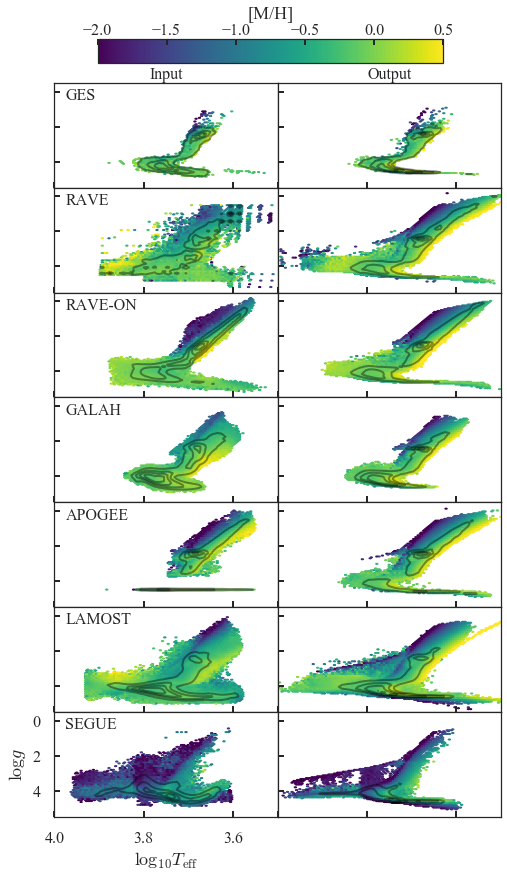

In [63]:
f,a=plt.subplots(7,2,figsize=[8.,13.5])
plt.subplots_adjust(wspace=0.,hspace=0.)
plt.sca(a[0][0]);plt.gca().annotate('Input',(0.5,1.),
                                    fontsize=16,xycoords='axes fraction',ha='center',va='bottom')
plt.sca(a[0][1]);plt.gca().annotate('Output',(0.5,1.),
                                    fontsize=16,xycoords='axes fraction',ha='center',va='bottom')
input_output(ges_inputs, ges, a[0], 'GES')
input_output(rave_inputs, rave, a[1], 'RAVE')
input_output(raveON_inputs, raveON, a[2], 'RAVE-ON')
input_output(galah_inputs, galah, a[3], 'GALAH')
input_output(apogee_inputs, apogee, a[4], 'APOGEE')
input_output(lamost_inputs, lamost, a[5], 'LAMOST')
c = input_output(segue_inputs, segue, a[6], 'SEGUE', axis_labels=True)
cb_ax = f.add_axes([0.2, 0.9, 0.6, 0.025])
cbar = f.colorbar(c, cax=cb_ax, label='[M/H]', orientation='horizontal')
cbar.ax.xaxis.set_tick_params(pad=0.)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')
# plt.tight_layout()
plt.savefig('hr_diagrams_hex.png',dpi=200,bbox_inches='tight')

In [65]:
def giants(d):
    return (d['logg']<3.)&(d['log10_teff']<3.73)
def turnoff(d):
    return (d['logg']<4.5)&(d['logg']>3.6)&(d['log10_teff']<4.1)
def hq_age(d):
    return (d['log10_age']>-1)&(d['log10_age_err']*np.log(10.)<0.3)

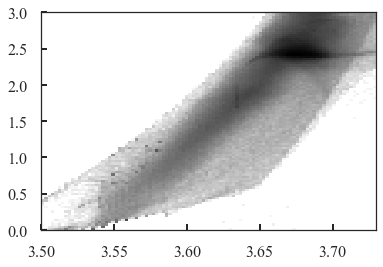

In [47]:
from matplotlib.colors import LogNorm
plt.hist2d(joint_table['log10_teff'],joint_table['logg'],range=[[3.5,3.73],[0.,3.]],bins=100,norm=LogNorm());

(0.0, 5.0)

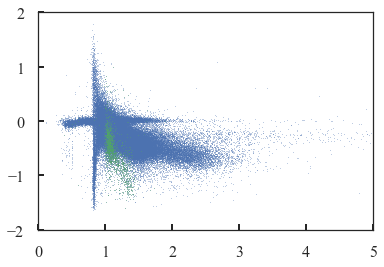

In [92]:
plt.plot(apogee['mass'][(apogee['flag']==0)],
         apogee_inputs['C_N'][(apogee['flag']==0)],'.',ms=1)
plt.plot(apogee['mass'][(apogee['flag']==0)&(apogee['Z']<-0.8)&(apogee['log10_age']<.8)&(apogee['log10_age']>0.)],
         apogee_inputs['C_N'][(apogee['flag']==0)&(apogee['Z']<-0.8)&(apogee['log10_age']<.8)&(apogee['log10_age']>0.)],'.',ms=1)
plt.ylim(-2.,2.)
plt.xlim(0.,5.)

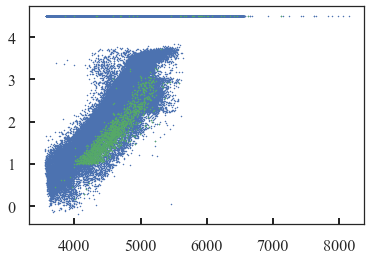

In [82]:
plt.plot(apogee_inputs['teff'][(apogee['flag']==0)],
         apogee_inputs['logg'][(apogee['flag']==0)],'.',ms=3)
plt.plot(apogee_inputs['teff'][(apogee['flag']==0)&(apogee['Z']<-0.8)&(apogee['log10_age']<.8)&(apogee['log10_age']>0.)],
         apogee_inputs['logg'][(apogee['flag']==0)&(apogee['Z']<-0.8)&(apogee['log10_age']<.8)&(apogee['log10_age']>0.)],'.',ms=3)

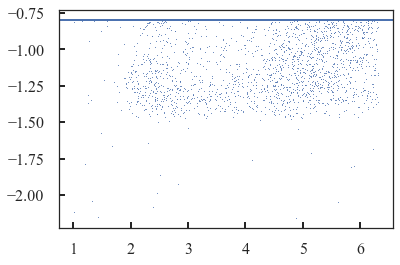

In [75]:
plt.plot(np.power(10.,apogee['log10_age'])[(apogee['flag']==0)&(apogee['Z']<-0.8)&(apogee['log10_age']<.8)&(apogee['log10_age']>0.)],
         apogee['Z'][(apogee['flag']==0)&(apogee['Z']<-0.8)&(apogee['log10_age']<0.8)&(apogee['log10_age']>0.)],'.',ms=2)
plt.axhline(-0.8)

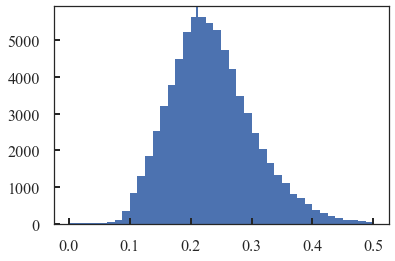

In [510]:
plt.hist(galah['log10_age_err'][giants(galah)]*np.log(10.),range=[0.,0.5],bins=40);
plt.axvline(0.21)

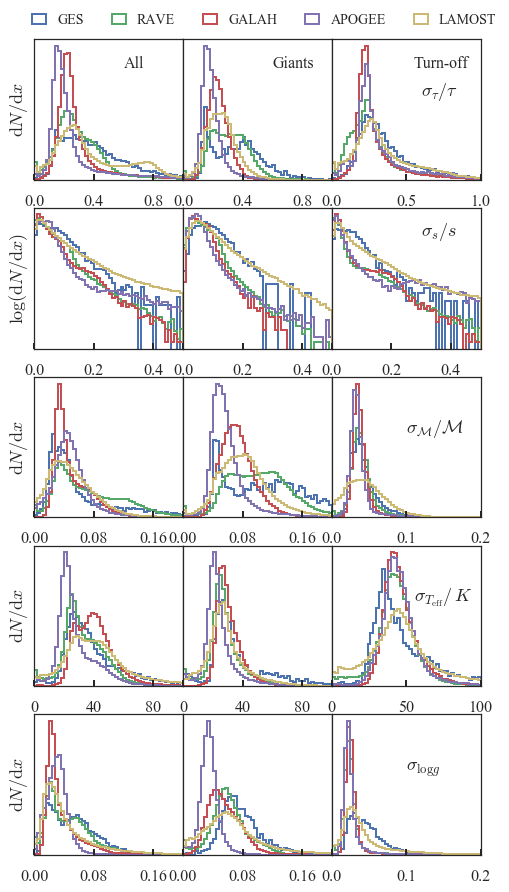

In [66]:
from matplotlib.ticker import MaxNLocator
f,a=plt.subplots(5,3,figsize=[8,15.])
plt.sca(a[0][0])
plt.subplots_adjust(wspace=0.)
[plt.hist(s['log10_age_err'][(s['log10_age']>-.1)&(s['flag']==0)]*np.log(10.),bins=50,
          histtype='step',range=[0.,1.],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
# plt.xlabel(r'$\sigma_\tau/\tau$')
plt.legend(loc='lower left',bbox_to_anchor=(-0.1,1.), ncol=5, handlelength=1, fontsize=14)
plt.annotate('All', xy=(0.6,0.8), xycoords='axes fraction', fontsize=16)

plt.sca(a[0][1])
plt.annotate('Giants', xy=(0.6,0.8), xycoords='axes fraction', fontsize=16)
[plt.hist(s['log10_age_err'][((s['log10_age']>-.1)&(s['flag']==0))&giants(s)]*np.log(10.),bins=50,
          histtype='step',range=[0.,1.],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
# plt.xlabel(r'$\sigma_\tau/\tau$')
# plt.legend()
plt.sca(a[0][2])
plt.annotate('Turn-off', xy=(0.55,0.8), xycoords='axes fraction', fontsize=16)
[plt.hist(s['log10_age_err'][((s['log10_age']>-.1)&(s['flag']==0))&turnoff(s)]*np.log(10.),bins=50,
          histtype='step',range=[0.,1.],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
plt.annotate(r'$\sigma_\tau/\tau$', xy=(0.6,0.6), xycoords='axes fraction', fontsize=18)

plt.sca(a[1][0])
plt.subplots_adjust(wspace=0.)
[plt.hist((s['dist_err']/s['dist'])[(s['log10_age']>-.1)&(s['flag']==0)],bins=50,
          histtype='step',range=[0.,0.5],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
# plt.xlabel(r'$\sigma_d/d$')
plt.semilogy()

# plt.legend()
plt.sca(a[1][1])
[plt.hist((s['dist_err']/s['dist'])[((s['log10_age']>-.1)&(s['flag']==0))&giants(s)],bins=50,
          histtype='step',range=[0.,0.5],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
# plt.xlabel(r'$\sigma_d/d$')
plt.semilogy()
# plt.legend()
plt.sca(a[1][2])
[plt.hist((s['dist_err']/s['dist'])[((s['log10_age']>-.1)&(s['flag']==0))&turnoff(s)],bins=50,
          histtype='step',range=[0.,0.5],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
# plt.xlabel(r'$\sigma_d/d$')
plt.annotate(r'$\sigma_s/s$', xy=(0.6,0.8), xycoords='axes fraction', fontsize=18)
plt.semilogy()

plt.sca(a[2][0])
[plt.hist((s['mass_err']/s['mass'])[(s['log10_age']>-.1)&(s['flag']==0)],bins=50,
          histtype='step',range=[0.,0.2],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
# plt.xlabel(r'$\sigma_\tau/\tau$')
# plt.annotate('All', xy=(0.6,0.8), xycoords='axes fraction', fontsize=16)

plt.sca(a[2][1])
# plt.annotate('Giants', xy=(0.6,0.8), xycoords='axes fraction', fontsize=16)
[plt.hist((s['mass_err']/s['mass'])[((s['log10_age']>-.1)&(s['flag']==0))&giants(s)],bins=50,
          histtype='step',range=[0.,0.2],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
# plt.xlabel(r'$\sigma_\tau/\tau$')
# plt.legend()
plt.sca(a[2][2])
# plt.annotate('Turn-off', xy=(0.55,0.8), xycoords='axes fraction', fontsize=16)
[plt.hist((s['mass_err']/s['mass'])[((s['log10_age']>-.1)&(s['flag']==0))&turnoff(s)],bins=50,
          histtype='step',range=[0.,0.2],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
plt.annotate(r'$\sigma_\mathcal{M}/\mathcal{M}$', xy=(0.5,0.6), xycoords='axes fraction', fontsize=18)

plt.sca(a[3][0])
[plt.hist((s['log10_teff_err']*np.log(10.)*np.power(10.,s['log10_teff']))[(s['log10_age']>-.1)&(s['flag']==0)],bins=50,
          histtype='step',range=[0.,100],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
# plt.xlabel(r'$\sigma_\tau/\tau$')
# plt.annotate('All', xy=(0.6,0.8), xycoords='axes fraction', fontsize=16)

plt.sca(a[3][1])
# plt.annotate('Giants', xy=(0.6,0.8), xycoords='axes fraction', fontsize=16)
[plt.hist((s['log10_teff_err']*np.log(10.)*np.power(10.,s['log10_teff']))[((s['log10_age']>-.1)&(s['flag']==0))&giants(s)],bins=50,
          histtype='step',range=[0.,100],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
# plt.xlabel(r'$\sigma_\tau/\tau$')
# plt.legend()
plt.sca(a[3][2])
# plt.annotate('Turn-off', xy=(0.55,0.8), xycoords='axes fraction', fontsize=16)
[plt.hist((s['log10_teff_err']*np.log(10.)*np.power(10.,s['log10_teff']))[((s['log10_age']>-.1)&(s['flag']==0))&turnoff(s)],bins=50,
          histtype='step',range=[0.,100],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
plt.annotate(r'$\sigma_{T_\mathrm{eff}}/\,K$', xy=(0.55,0.6), xycoords='axes fraction', fontsize=18)

plt.sca(a[4][0])
[plt.hist((s['logg_err'])[(s['log10_age']>-.1)&(s['flag']==0)],bins=50,
          histtype='step',range=[0.,0.2],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
# plt.xlabel(r'$\sigma_\tau/\tau$')
# plt.annotate('All', xy=(0.6,0.8), xycoords='axes fraction', fontsize=16)

plt.sca(a[4][1])
# plt.annotate('Giants', xy=(0.6,0.8), xycoords='axes fraction', fontsize=16)
[plt.hist((s['logg_err'])[((s['log10_age']>-.1)&(s['flag']==0))&giants(s)],bins=50,
          histtype='step',range=[0.,0.2],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
# plt.xlabel(r'$\sigma_\tau/\tau$')
# plt.legend()
plt.sca(a[4][2])
# plt.annotate('Turn-off', xy=(0.55,0.8), xycoords='axes fraction', fontsize=16)
[plt.hist((s['logg_err'])[((s['log10_age']>-.1)&(s['flag']==0))&turnoff(s)],bins=50,
          histtype='step',range=[0.,0.2],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
plt.annotate(r'$\sigma_{\log g}$', xy=(0.5,0.6), xycoords='axes fraction', fontsize=18)

for i in range(3):
    a[0][i].set_xlim(0.,1.)
    a[1][i].set_xlim(0.,0.5)
    a[2][i].set_xlim(0.,0.2)
    a[3][i].set_xlim(0.,100)
    a[4][i].set_xlim(0.,0.2)
for i in range(5):
    a[i][0].set_ylabel(r'$\mathrm{d}N/\mathrm{d}x$')
    for j in range(3):
        a[i][j].axes.get_yaxis().set_ticks([])
    for j in range(2):
        a[i][j].xaxis.set_major_locator(MaxNLocator(nbins=3))
a[1][0].set_ylabel(r'$\log(\mathrm{d}N/\mathrm{d}x)$')
# plt.legend()
plt.savefig('uncertainties.pdf', bbox_inches='tight')

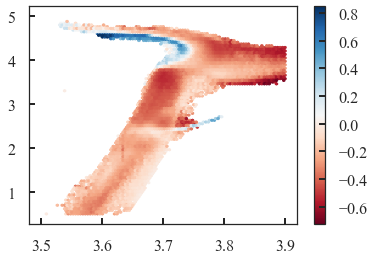

In [389]:
plt.hexbin(joint_table[joint_table['best']==1]['log10_teff'],
          joint_table[joint_table['best']==1]['logg'],
          C=joint_table[joint_table['best']==1]['log10age_Z_corr'],cmap=plt.cm.RdBu,
          extent=[3.5,3.9,0.5,5.],mincnt=20)
plt.colorbar()

# On-sky maps

In [67]:
import healpy as hp
def gen_fast_map(data, nside=64, bin_edges=[0.,0.],label='', title=None):
    b = np.rad2deg(data.b)
    l = np.rad2deg(data.l)
    fltr = (b>-90.)&(b<90.)
    l=l[fltr]
    b=b[fltr]
    ip_ = hp.ang2pix(nside, l, b, lonlat=True)
    npixel  = hp.nside2npix(nside)
    map_ = np.bincount(ip_,minlength=npixel)
    map = np.log10(map_+1.)
    if title is None:
        title='%0.2f,%0.2f'%(bin_edges[0],bin_edges[1])
    hp.visufunc.mollview(map,hold=True,title=title,unit=label)

def gen_fast_map_fld(data, fld, nside=64, vmin=None, vmax=None, 
                     bin_edges=[0.,0.],cmap=plt.cm.viridis,label='',rot=None, title=None, mincnt=10):
    cmap.set_under('white')
    b = np.rad2deg(data.b)
    l = np.rad2deg(data.l)
    fltr = (b>-90.)&(b<90.)
    l=l[fltr]
    b=b[fltr]
    fldd=data[fld][fltr]
    ip_ = hp.ang2pix(nside, l, b, lonlat=True)
    npixel  = hp.nside2npix(nside)
    map = np.array([np.nanmedian(fldd[ip_==i]) for i in range(npixel)])
    cnt_ = np.bincount(ip_,minlength=npixel)
    map[cnt_<mincnt]=np.nan
    if title is None:
        title='%0.2f,%0.2f'%(bin_edges[0],bin_edges[1])
    hp.visufunc.mollview(map,hold=True,min=vmin,max=vmax,
                    title=title,cmap=cmap,unit='',rot=rot)
    plt.annotate(label,xy=(0.5,-0.2),xycoords='axes fraction',fontsize=20,ha='center',va='top')
    
    
def gen_fast_map_fld_DIFF(data, data2, fld, nside=64, vmin=None, vmax=None, 
                     bin_edges=[0.,0.],cmap=plt.cm.viridis,label='',rot=None, title=None, mincnt=10,
                         log_scl=False):
    cmap.set_under('white')
    
    b = np.rad2deg(data.b)
    l = np.rad2deg(data.l)
    fltr = (b>-90.)&(b<90.)
    l=l[fltr]
    b=b[fltr]
    fldd=data[fld][fltr]
    ip_ = hp.ang2pix(nside, l, b, lonlat=True)
    npixel  = hp.nside2npix(nside)
    map = np.array([np.nanmedian(fldd[ip_==i]) for i in range(npixel)])
    cnt_ = np.bincount(ip_,minlength=npixel)
    map[cnt_<mincnt]=np.nan
    
    b = np.rad2deg(data2.b)
    l = np.rad2deg(data2.l)
    fltr = (b>-90.)&(b<90.)
    l=l[fltr]
    b=b[fltr]
    fldd=data2[fld][fltr]
    ip_ = hp.ang2pix(nside, l, b, lonlat=True)
    npixel  = hp.nside2npix(nside)
    map2 = np.array([np.nanmedian(fldd[ip_==i]) for i in range(npixel)])
    cnt_ = np.bincount(ip_,minlength=npixel)
    map2[cnt_<mincnt]=np.nan
    
    if title is None:
        title='%0.2f,%0.2f'%(bin_edges[0],bin_edges[1])
    deltamap=map2-map
    if log_scl:
        deltamap=np.log10(np.abs(deltamap))
    hp.visufunc.mollview(deltamap,hold=True,min=vmin,max=vmax,
                    title=title,cmap=cmap,unit='',rot=rot)
    plt.annotate(label,xy=(0.5,-0.2),xycoords='axes fraction',fontsize=20,ha='center',va='top')
    
    
def gen_fast_map_fld_radec(data, fld, nside=64, vmin=None, vmax=None, 
                     bin_edges=[0.,0.],cmap=plt.cm.viridis,label='',rot=None, title=None, mincnt=10):
    cmap.set_under('white')
    b = data.dec
    l = data.ra
    fltr = (b>-90.)&(b<90.)
    l=l[fltr]
    b=b[fltr]
    fldd=data[fld][fltr]
    ip_ = hp.ang2pix(nside, l, b, lonlat=True)
    npixel  = hp.nside2npix(nside)
    map = np.array([np.nanmedian(fldd[ip_==i]) for i in range(npixel)])
    cnt_ = np.bincount(ip_,minlength=npixel)
    map[cnt_<mincnt]=np.nan
    if title is None:
        title='%0.2f,%0.2f'%(bin_edges[0],bin_edges[1])
    hp.visufunc.mollview(map,hold=True,min=vmin,max=vmax,
                    title=title,cmap=cmap,unit='',rot=rot)
    plt.annotate(label,xy=(0.5,-0.2),xycoords='axes fraction',fontsize=20,ha='center',va='top')

In [68]:
P = joint_table.to_pandas().reset_index(drop=True)
P = P[P['best']==1][['l','b','age','log10_age_err','logg','log10_teff','log10_av','s','Z','z','R']]

/home/jls/.local/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:1018: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/jls/.local/lib/python2.7/site-packages/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/home/jls/.local/lib/python2.7/site-packages/healpy/projaxes.py:1053: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/home/jls/.local/lib/python2.7/site-packages/healpy/projaxes.py:1054: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


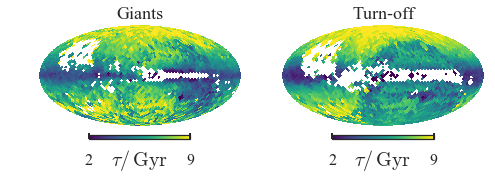

In [69]:
from matplotlib.colors import LogNorm
f,a=plt.subplots(1,2,figsize=[8.,3.])
plt.sca(a[0])
gen_fast_map_fld(P[giants(P)], 'age',nside=16,vmin=2.,vmax=9., label=r'$\tau/\,\mathrm{Gyr}$', title='Giants')
plt.sca(a[1])
gen_fast_map_fld(P[turnoff(P)], 'age',nside=16,vmin=2.,vmax=9., label=r'$\tau/\,\mathrm{Gyr}$', title='Turn-off')
plt.savefig('age_distribution.pdf', bbox_inches='tight')

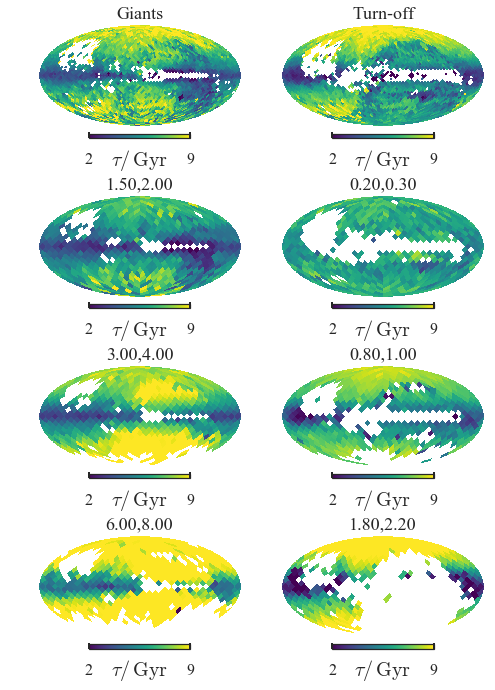

In [70]:
f,a=plt.subplots(4,2,figsize=[8.,12.])
plt.sca(a[0][0])
gen_fast_map_fld(P[giants(P)], 'age',nside=16,vmin=2.,vmax=9., label=r'$\tau/\,\mathrm{Gyr}$', title='Giants')
plt.sca(a[1][0])
gen_fast_map_fld(P[giants(P)&(P['s']>1.5)&(P['s']<2.)],
                 'age',nside=8,vmin=2.,vmax=9.,bin_edges=[1.5,2.], label=r'$\tau/\,\mathrm{Gyr}$')
plt.sca(a[2][0])
gen_fast_map_fld(P[giants(P)&(P['s']>3.)&(P['s']<4.)],
                 'age',nside=8,vmin=2.,vmax=9.,bin_edges=[3.,4.], label=r'$\tau/\,\mathrm{Gyr}$')
plt.sca(a[3][0])
gen_fast_map_fld(P[giants(P)&(P['s']>6.)&(P['s']<8.)],
                 'age',nside=8,vmin=2.,vmax=9.,bin_edges=[6.,8.], label=r'$\tau/\,\mathrm{Gyr}$')
plt.sca(a[0][1])
gen_fast_map_fld(P[turnoff(P)], 'age',nside=16,vmin=2.,vmax=9., label=r'$\tau/\,\mathrm{Gyr}$', title='Turn-off')
plt.sca(a[1][1])
gen_fast_map_fld(P[turnoff(P)&(P['s']>0.2)&(P['s']<0.3)],
                 'age',nside=8,vmin=2.,vmax=9.,mincnt=20,rot=0, label=r'$\tau/\,\mathrm{Gyr}$',bin_edges=[0.2,0.3])
plt.sca(a[2][1])
gen_fast_map_fld(P[turnoff(P)&(P['s']>0.8)&(P['s']<1.)],
                 'age',nside=8,vmin=2.,vmax=9.,mincnt=20,rot=0, label=r'$\tau/\,\mathrm{Gyr}$',bin_edges=[0.8,1.])
plt.sca(a[3][1])
gen_fast_map_fld(P[turnoff(P)&(P['s']>1.8)&(P['s']<2.2)],
                 'age',nside=8,vmin=2.,vmax=9.,mincnt=20,rot=0, label=r'$\tau/\,\mathrm{Gyr}$',bin_edges=[1.8,2.2])
plt.savefig('age_distribution_split.pdf', bbox_inches='tight')

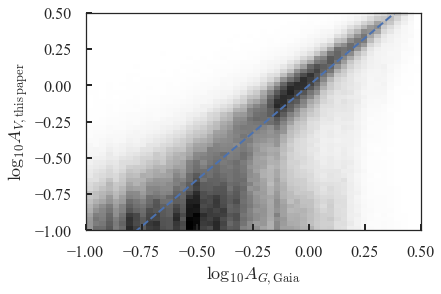

In [71]:
plt.hist2d(np.log10(jointinputs.a_g_val.values)[(joint['flag']==0)],
           joint['log10_av'][(joint['flag']==0)].astype(np.float64),
           range=[[-1.,0.5],[-1.,0.5]],bins=50);
xx = np.linspace(-1.,0.5)
plt.plot(xx,xx/0.77,label=r'$\frac{R(G)}{R(V)}=0.77$',ls='dashed')
plt.xlabel(r'$\log_{10}A_{G,\mathrm{Gaia}}$')
plt.ylabel(r'$\log_{10}A_{V,\mathrm{this\,paper}}$')
plt.savefig('extinction_ag_av.pdf', bbox_inches='tight')

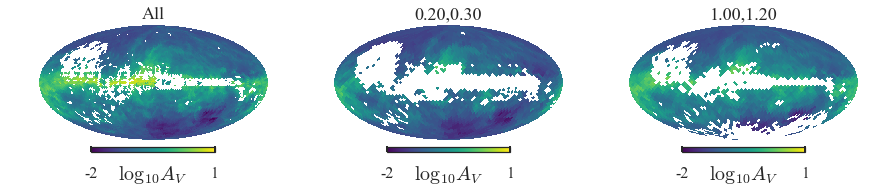

In [25]:
from matplotlib.colors import LogNorm
f,a=plt.subplots(1,3,figsize=[15.,2.5])
plt.sca(a[1])
gen_fast_map_fld(joint_table[(joint_table['best']==1)&(joint_table['s']<0.3)&(joint_table['s']>0.2)].to_pandas(),
                 'log10_av',nside=16,vmin=-2.,vmax=1.,label=r'$\log_{10}A_V$',bin_edges=[0.2,0.3])
plt.sca(a[2])
gen_fast_map_fld(joint_table[(joint_table['best']==1)&(joint_table['s']>1.)&(joint_table['s']<1.2)].to_pandas(),
                 'log10_av',nside=16,vmin=-2.,vmax=1.,label=r'$\log_{10}A_V$',bin_edges=[1.,1.2])
plt.sca(a[0])
gen_fast_map_fld(joint_table[(joint_table['best']==1)].to_pandas(),
                 'log10_av',nside=32,vmin=-2.,vmax=1.,label=r'$\log_{10}A_V$',bin_edges=[3.,3.5], title='All')
# plt.sca(a[2])
# plt.hist2d(np.log10(jointinputs.a_g_val)[(joint_table['best']==1)],
#            joint_table['log10_av'][(joint_table['best']==1)],range=[[-1.,0.5],[-1.,0.5]],bins=50);#,norm=LogNorm());
# xx = np.linspace(-1.,0.5)
# # plt.plot(xx,xx,label=r'$\frac{R(G)}{R(V)}=1$')
# plt.plot(xx,xx/0.77,label=r'$\frac{R(G)}{R(V)}=0.77$',ls='dashed')
# # plt.legend(loc='upper left')
# plt.xlabel(r'$\log_{10}A_{G,\mathrm{Gaia}}$')
# plt.ylabel(r'$\log_{10}A_{V,\mathrm{this\,paper}}$')
# plt.tight_layout()
plt.savefig('extinction.pdf',bbox_inches='tight')

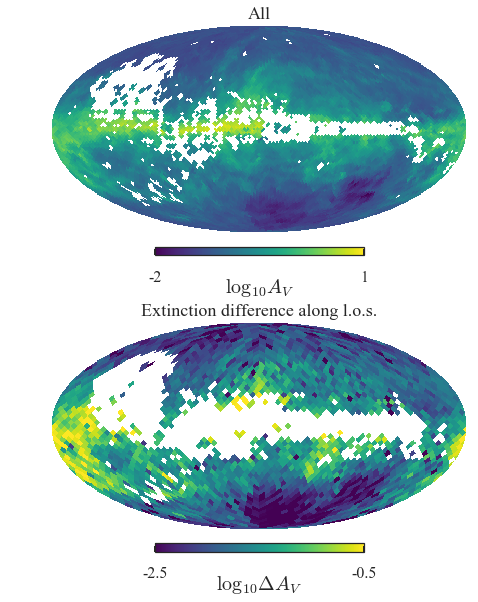

In [72]:
from matplotlib.colors import LogNorm
f,a=plt.subplots(2,1,figsize=[7.5,10])
# plt.sca(a[1])
# gen_fast_map_fld(joint_table[(joint_table['best']==1)&(joint_table['s']<0.3)&(joint_table['s']>0.2)].to_pandas(),
#                  'log10_av',nside=16,vmin=-2.,vmax=1.,label=r'$\log_{10}A_V$',bin_edges=[0.2,0.3])
# plt.sca(a[2])
# gen_fast_map_fld(joint_table[(joint_table['best']==1)&(joint_table['s']>1.)&(joint_table['s']<1.2)].to_pandas(),
#                  'log10_av',nside=16,vmin=-2.,vmax=1.,label=r'$\log_{10}A_V$',bin_edges=[1.,1.2])
plt.sca(a[1])
joint_table['av']=np.power(10.,joint_table['log10_av'])
gen_fast_map_fld_DIFF(
                      joint_table[(joint_table['best']==1)&(joint_table['s']<0.25)&(joint_table['s']>0.15)].to_pandas(),
                      joint_table[(joint_table['best']==1)&(joint_table['s']>0.25)&(joint_table['s']<0.35)].to_pandas(),
                 'av',nside=16,vmin=-2.5,vmax=-0.5,label=r'$\log_{10}\Delta A_V$',bin_edges=[1.,1.2],log_scl=True,
                mincnt=5,title='Extinction difference along l.o.s.')
plt.sca(a[0])
gen_fast_map_fld(joint_table[(joint_table['best']==1)].to_pandas(),
                 'log10_av',nside=32,vmin=-2.,vmax=1.,label=r'$\log_{10}A_V$',bin_edges=[3.,3.5], title='All')

plt.savefig('extinction_vertical.pdf',bbox_inches='tight')

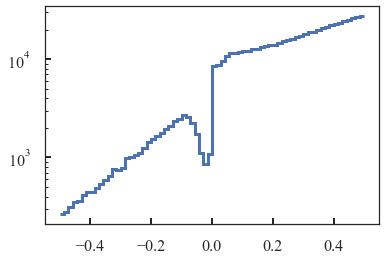

In [43]:
plt.hist(joint['par_err'].values[joint['flag']==0]/jointinputs['parallax_error'].values[joint['flag']==0],
         histtype='step',lw=3,bins=70,range=[-.5,.5]);
plt.semilogy();

(0.0, 3.0)

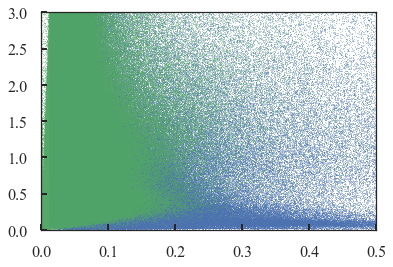

In [59]:
plt.plot(jointinputs['parallax_error'].values[(joint['flag']==0)&(jointinputs['parallax_error'].values>0.)],
        joint['par'].values[(joint['flag']==0)&(jointinputs['parallax_error'].values>0.)],'.',ms=1)
plt.plot(joint['par_err'].values[(joint['flag']==0)&(jointinputs['parallax_error'].values>0.)],
        joint['par'].values[(joint['flag']==0)&(jointinputs['parallax_error'].values>0.)],'.',ms=1)

plt.xlim(0.,0.5)
plt.ylim(0.,3.)

(0.0, 3.0)

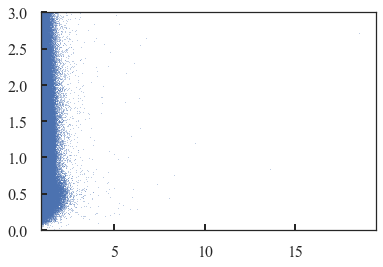

In [54]:
plt.plot(joint['par_err'].values[(joint['flag']==0)&(jointinputs['parallax_error'].values>0.)]
         /jointinputs['parallax_error'].values[(joint['flag']==0)&(jointinputs['parallax_error'].values>0.)],
        joint['par'].values[(joint['flag']==0)&(jointinputs['parallax_error'].values>0.)],'.',ms=1)
plt.xlim(1.,)
plt.ylim(0.,3.)

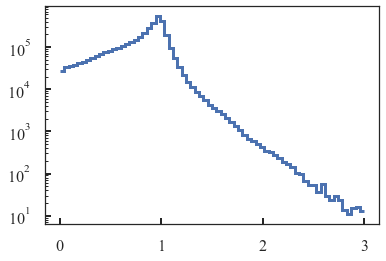

In [49]:
plt.hist(joint['par_err'].values[(joint['flag']==0)&(jointinputs['parallax_error'].values>0.)]
         /jointinputs['parallax_error'].values[(joint['flag']==0)&(jointinputs['parallax_error'].values>0.)],
         histtype='step',lw=3,bins=70,range=[0.,3.]);

# plt.hist(joint['par_err'].values[joint['flag']!=0]-jointinputs['parallax_error'].values[joint['flag']!=0],
#          histtype='step',lw=3,bins=70,range=[-.5,.5]);
plt.semilogy();

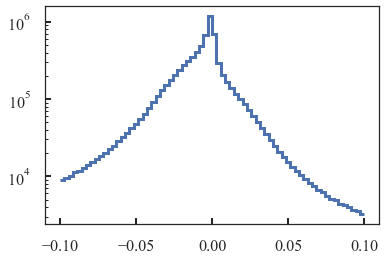

In [27]:
plt.hist(joint['par_err']-jointinputs['parallax_error'],
         histtype='step',lw=3,bins=70,range=[-.1,.1]);
plt.semilogy();

## Velocity dispersion, action dispersion

In [95]:
from scipy.optimize import leastsq, brentq
def mini(v,sig,s=None):
    if s is None:
        s = np.nanstd(v)
    s*=1.05
    m = np.nanmedian(v)
    v, sig = v[np.abs(v-m)<3.*s], sig[np.abs(v-m)<3.*s]
    def l(p):
        return np.sum((v-m)**2/(p**2+sig**2)**2-1./(p**2+sig**2))
    ll = l(s)
    s1 = .99*s
    while ll*l(s1)>0 and s1>5.:
        s1 *=0.99
    if s1<5.:
        return np.nan
    return brentq(l,s1,s,xtol=1e-2)

In [74]:
gg = joint_table[(joint_table['best']==1)&(joint_table['log10_age_err']<0.2)#&(joint_table['dist_err']/joint_table['dist']<0.2)
                 &((turnoff(joint_table))|giants(joint_table))].to_pandas()
print len(gg)

1965703


In [75]:
print np.count_nonzero((np.abs(gg['z'])<0.6)&(gg['Z']>-1.))

1196963


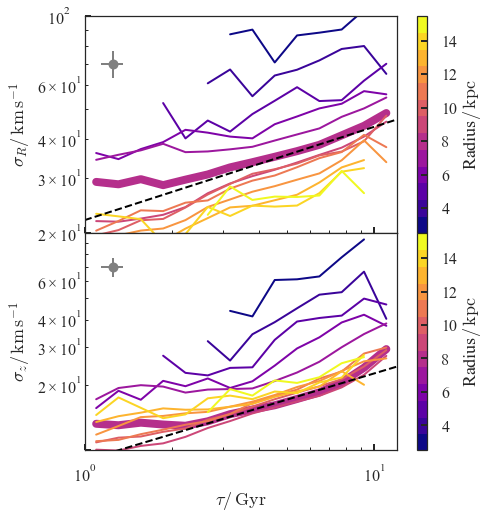

In [97]:
import matplotlib.cm as cmx
import matplotlib.colors as colors
from scipy.stats import gaussian_kde
import sys
sys.path.append('../../rave_cannon_distances/')
sys.path.append('../../rave_cannon_distances/veldisp_plots/')
from plotting_rave import *

def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

def get_scalarMap(vals):
#     cm = discrete_cmap(len(vals), base_cmap='plasma')
    cm = plt.cm.get_cmap('plasma',len(vals))
    cNorm=colors.Normalize(vmin=vals[0]-.5*(vals[1]-vals[0]),vmax=vals[-1]+.5*(vals[1]-vals[0]))
    sM = cmx.ScalarMappable(norm=cNorm,cmap=cm)
    sM._A=[]
    return sM

fig,ax = plt.subplots(2,1,figsize=[7.,8.])
plt.subplots_adjust(hspace=0.)
plt.sca(ax[0])

age_bins=np.logspace(np.log10(1.),np.log10(12.),15)
age_centroids=.5*(age_bins[1:]+age_bins[:-1])

Rbins = np.array([2.,3.,4.,5.,6.,7.,8.,9.,10.,11.,12.,13.,14.,15.])+.5
Rcentroids = .5*(Rbins[1:]+Rbins[:-1])
scalarMap = get_scalarMap(Rcentroids)
for r in range(len(Rbins)-1):
    dd = gg[(gg['R']>Rbins[r])&(gg['R']<Rbins[r+1])&(np.abs(gg['z'])<0.6)&(gg['Z']>-1.)]
    cnt = np.array([len(dd['vR'][(dd['age']>ad)&(dd['age']<au)].values) for ad,au in zip(age_bins[:-1],age_bins[1:])])
    err = np.array([mini(dd['vR'][(dd['age']>ad)&(dd['age']<au)].values,
                dd['vR_err'][(dd['age']>ad)&(dd['age']<au)].values,
                sigma_clip(dd['vR'][(dd['age']>ad)&(dd['age']<au)].values).clipped.std()) 
           for ad,au in zip(age_bins[:-1],age_bins[1:])])
    lw = 2
    if .5*(Rbins[r]+Rbins[r+1])==8.:
        lw=8
    plt.plot(age_centroids[cnt>50],err[cnt>50],color=scalarMap.to_rgba(.5*(Rbins[r]+Rbins[r+1])),lw=lw)

plt.semilogy()
plt.semilogx()
plt.ylim(20.,100.)
plt.xlim(1.,12.)
xx = np.linspace(1.,12.)
plt.plot(xx,22.*xx**0.3,color='k',ls='dashed')
plt.colorbar(scalarMap,label='Radius$ /\,\mathrm{kpc}$')
plt.xlabel(r'$\tau/\,\mathrm{Gyr}$')
plt.ylabel(r'$\sigma_R/\,\mathrm{km\,s}^{-1}$')
plt.errorbar([1.25],[70.],xerr=np.array([[1.25-np.exp(-(np.log(age_bins[2])-np.log(age_bins[1]))*.5+np.log(1.25)),
                                np.exp((np.log(age_bins[2])-np.log(age_bins[1]))*.5+np.log(1.25))-1.25]]),
             yerr=[70.*np.sqrt(1./2./50.)],color='gray',fmt='o',ms=10)
plt.gca().set_xticklabels([])
plt.sca(ax[1])

Rbins = np.array([2.,3.,4.,5.,6.,7.,8.,9.,10.,11.,12.,13.,14.,15.])+.5
Rcentroids = .5*(Rbins[1:]+Rbins[:-1])
scalarMap = get_scalarMap(Rcentroids)
for r in range(len(Rbins)-1):
    dd = gg[(gg['R']>Rbins[r])&(gg['R']<Rbins[r+1])&(np.abs(gg['z'])<0.6)&(gg['Z']>-1.)]
    cnt = np.array([len(dd['vz'][(dd['age']>ad)&(dd['age']<au)].values) for ad,au in zip(age_bins[:-1],age_bins[1:])])
    err = np.array([mini(dd['vz'][(dd['age']>ad)&(dd['age']<au)].values,
                dd['vz_err'][(dd['age']>ad)&(dd['age']<au)].values,
                sigma_clip(dd['vz'][(dd['age']>ad)&(dd['age']<au)].values).clipped.std()) 
           for ad,au in zip(age_bins[:-1],age_bins[1:])])
    lw = 2
    if .5*(Rbins[r]+Rbins[r+1])==8.:
        lw=8
    plt.plot(age_centroids[cnt>50],err[cnt>50],color=scalarMap.to_rgba(.5*(Rbins[r]+Rbins[r+1])),lw=lw)
plt.gca().set_yticklabels([])
plt.semilogy()
plt.semilogx()
plt.ylim(10.,100.)
plt.xlim(1.,12.)
xx = np.linspace(1.,12.)
plt.plot(xx,9.*xx**0.4,color='k',ls='dashed')
plt.gca().set_yticklabels(plt.gca().get_yticklabels()[:-2])
plt.colorbar(scalarMap,label='Radius$ /\,\mathrm{kpc}$')
plt.xlabel(r'$\tau/\,\mathrm{Gyr}$')
plt.ylabel(r'$\sigma_z/\,\mathrm{km\,s}^{-1}$')

plt.errorbar([1.25],[70.],xerr=np.array([[1.25-np.exp(-(np.log(age_bins[2])-np.log(age_bins[1]))*.5+np.log(1.25)),
                                np.exp((np.log(age_bins[2])-np.log(age_bins[1]))*.5+np.log(1.25))-1.25]]),
             yerr=[70.*np.sqrt(1./2./50.)],color='gray',fmt='o',ms=10)

plt.savefig('sigma_age.pdf', bbox_inches='tight')

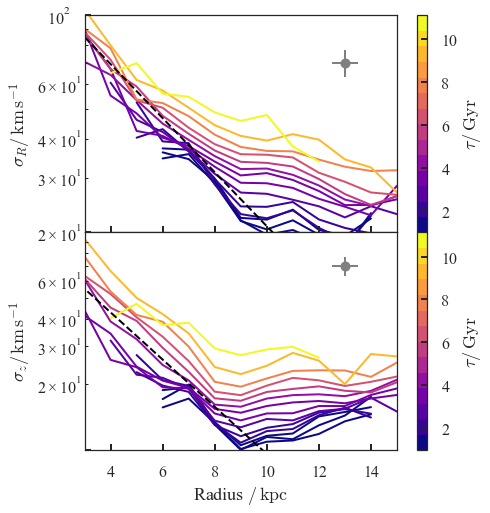

In [98]:
fig,ax = plt.subplots(2,1,figsize=[7.,8.])
plt.subplots_adjust(hspace=0.)
plt.sca(ax[0])

age_bins=np.logspace(np.log10(1.),np.log10(12.),15)

Rbins = np.array([2.,3.,4.,5.,6.,7.,8.,9.,10.,11.,12.,13.,14.,15.])+.5
Rcentroids = .5*(Rbins[1:]+Rbins[:-1])
scalarMap = get_scalarMap(age_centroids)
for ad,au in zip(age_bins[:-1],age_bins[1:]):
    dd = gg[(gg['age']>ad)&(gg['age']<au)&(np.abs(gg['z'])<0.6)&(gg['Z']>-1.)]
    cnt = np.array([len(dd['vR'][(dd['R']>Rbins[r])&(dd['R']<Rbins[r+1])].values)
                   for r in range(len(Rbins)-1)])
    err = np.array([mini(dd['vR'][(dd['R']>Rbins[r])&(dd['R']<Rbins[r+1])].values,
                dd['vR_err'][(dd['R']>Rbins[r])&(dd['R']<Rbins[r+1])].values,
                sigma_clip(dd['vR'][(dd['R']>Rbins[r])&(dd['R']<Rbins[r+1])].values).clipped.std()) 
           for r in range(len(Rbins)-1)])
    lw = 2
    plt.plot(Rcentroids[cnt>50],err[cnt>50],color=scalarMap.to_rgba(.5*(au+ad)),lw=lw)
plt.gca().set_xticklabels([])
plt.semilogy()
# plt.semilogx()
plt.ylim(20.,100.)
plt.xlim(3.,15.)
xx = np.linspace(1.,12.)
plt.plot(xx,np.exp(-(xx-8.2)/5.)*30.,color='k',ls='dashed')
plt.colorbar(scalarMap,label=r'$\tau/\,\mathrm{Gyr}$')
# plt.xlabel(r'Radius $/\,\mathrm{kpc}$')
plt.errorbar([13.],[70.],xerr=[.5],
             yerr=[70.*np.sqrt(1./2./50.)],color='gray',fmt='o',ms=10)
plt.ylabel(r'$\sigma_R/\,\mathrm{km\,s}^{-1}$')
plt.sca(ax[1])

Rbins = np.array([2.,3.,4.,5.,6.,7.,8.,9.,10.,11.,12.,13.,14.,15.])+.5
Rcentroids = .5*(Rbins[1:]+Rbins[:-1])
scalarMap = get_scalarMap(age_centroids)
for ad,au in zip(age_bins[:-1],age_bins[1:]):
    dd = gg[(gg['age']>ad)&(gg['age']<au)&(np.abs(gg['z'])<0.6)&(gg['Z']>-1.)]
    cnt = np.array([len(dd['vz'][(dd['R']>Rbins[r])&(dd['R']<Rbins[r+1])].values)
                   for r in range(len(Rbins)-1)])
    err = np.array([mini(dd['vz'][(dd['R']>Rbins[r])&(dd['R']<Rbins[r+1])].values,
                dd['vz_err'][(dd['R']>Rbins[r])&(dd['R']<Rbins[r+1])].values,
                sigma_clip(dd['vz'][(dd['R']>Rbins[r])&(dd['R']<Rbins[r+1])].values).clipped.std()) 
           for r in range(len(Rbins)-1)])
    lw = 2
    plt.plot(Rcentroids[cnt>50],err[cnt>50],color=scalarMap.to_rgba(.5*(au+ad)),lw=lw)
plt.gca().set_yticklabels([])
plt.semilogy()
# plt.semilogx()
plt.ylim(10.,100.)
plt.xlim(3.,15.)
xx = np.linspace(1.,12.)
plt.plot(xx,np.exp(-(xx-8.2)/4.)*15.,color='k',ls='dashed')
plt.colorbar(scalarMap,label=r'$\tau/\,\mathrm{Gyr}$')
plt.gca().set_yticklabels(plt.gca().get_yticklabels()[:-2])
plt.xlabel(r'Radius $/\,\mathrm{kpc}$')
plt.ylabel(r'$\sigma_z/\,\mathrm{km\,s}^{-1}$')
plt.errorbar([13.],[70.],xerr=[.5],yerr=[70.*np.sqrt(1./2./50.)],color='gray',fmt='o',ms=10)
plt.savefig('sigma_radius.pdf',bbox_inches='tight')

In [79]:
def plot_distributions(data,ax,compt='vR',sort_col='age',bins=50,range=[-150.,150.],cbar=False,label=None,
                      xlabel=None,agebins=10):
    data = data.copy()
    age_bins=np.linspace(0.,12.,agebins)
    age_centroids=.5*(age_bins[1:]+age_bins[:-1])
    scalarMap = get_scalarMap(age_centroids)
    nmax=0.
    for ad,au in zip(age_bins[:-1],age_bins[1:]):
        datasl = data[(data[sort_col]<au)&(data[sort_col]>ad)].reset_index(drop=True)
        datasl = datasl[datasl[compt].values==datasl[compt].values].reset_index(drop=True)
        dd = datasl[compt][(datasl[compt]>range[0])&(datasl[compt]<range[1])].values
        sns.kdeplot(dd,
                      lw=3,
                      color=scalarMap.to_rgba(.5*(ad+au)),ax=ax)
        ax.set_xlim(*range)
    if compt=='phi':
        compt=r'\phi'
    if(xlabel):
        ax.set_xlabel(r'$v_{%s}/\mathrm{km\,s}^{-1}$'%compt)
    if(cbar):
        plt.colorbar(scalarMap,boundaries=age_bins,label=r'$\tau/\mathrm{Gyr}$')
    if(label):
        ax.annotate(label,xy=(0.05,0.95),xycoords='axes fraction',fontsize=14,ha='left',va='top')
    return scalarMap

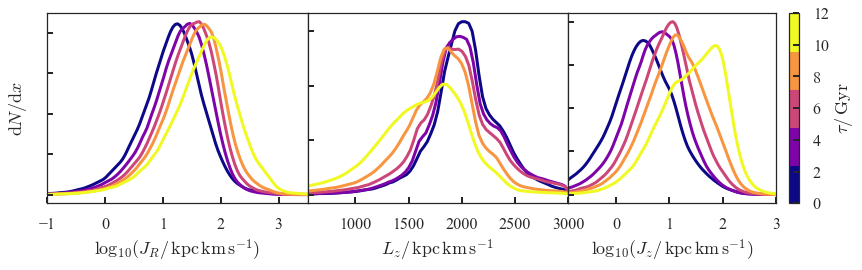

In [80]:
f,a=plt.subplots(1,3,figsize=[14.,3.5])
plt.subplots_adjust(wspace=0.)
gg['log10_JR']=np.log10(gg['JR'])
sM=plot_distributions(gg[(np.abs(gg['z'])<2.5)&(gg['Z']>-1.)],a[0],
                      compt='log10_JR',range=[-1.,4.],agebins=6)
sM=plot_distributions(gg[(np.abs(gg['z'])<2.5)&(gg['Z']>-1.)],a[1],
                      compt='Lz',range=[-1000.,3000.],agebins=6)
a[1].set_xlim(550.,3000.)
gg['log10_Jz']=np.log10(gg['Jz'])
sM=plot_distributions(gg[(np.abs(gg['z'])<2.5)&(gg['Z']>-1.)],a[2],
                      compt='log10_Jz',range=[-1.,4.],agebins=6)
plt.colorbar(sM,label=r'$\tau/\,\mathrm{Gyr}$')
a[2].set_xlim(-0.9,3.)
a[0].set_xlim(-1.,3.5)
a[0].set_yticklabels([])
a[1].set_yticklabels([])
a[2].set_yticklabels([])
a[0].set_ylabel(r'$\mathrm{d}N/\mathrm{d}x$')
a[0].set_xlabel(r'$\log_{10}(J_R/\,\mathrm{kpc\,km\,s}^{-1})$')
a[1].set_xlabel(r'$L_z/\,\mathrm{kpc\,km\,s}^{-1}$')
a[2].set_xlabel(r'$\log_{10}(J_z/\,\mathrm{kpc\,km\,s}^{-1})$')
plt.savefig('actions_age.pdf', bbox_inches='tight')

## Testing parallax offset

[]

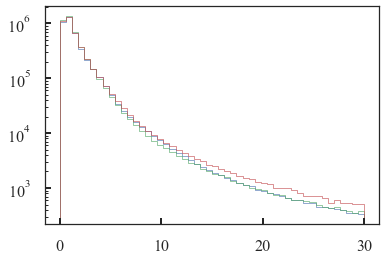

In [226]:
plt.hist(1./joint['par'],range=[0,30.],bins=50,histtype='step');
plt.hist(1./(jointinputs['parallax']+0.029),range=[0,30.],bins=50,histtype='step');
plt.hist(1./(jointinputs['parallax']),range=[0,30.],bins=50,histtype='step');
# plt.hist(1./apogee_inputs['parallax'],range=[0,30.],bins=50,histtype='step');
plt.semilogy()

[]

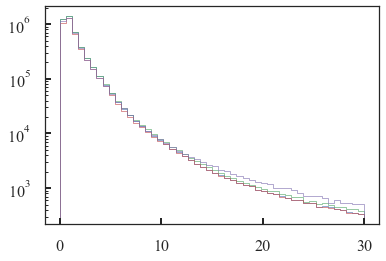

In [136]:
plt.hist(1./joint_table['par'],range=[0,30.],bins=50,histtype='step');
plt.hist(joint_table['dist'],range=[0,30.],bins=50,histtype='step');
plt.hist(1./joint['par'],range=[0,30.],bins=50,histtype='step');
plt.hist(1./jointinputs['parallax'],range=[0,30.],bins=50,histtype='step');
# plt.hist(1./(joint_table['par']+0.03),range=[0,20.],bins=50,histtype='step');
plt.semilogy()

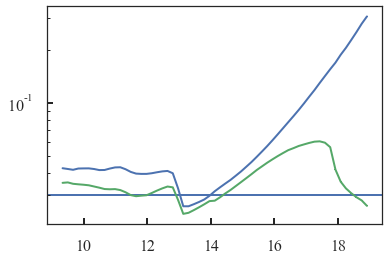

In [246]:
from plotting_general import running_median
r = running_median(jointinputs['G'].values,jointinputs['parallax_error'].values,nbins=60)
plt.errorbar(r[0],r[1],.5*(r[3]-r[2])/np.sqrt(2.*r[-1]))
r2 = running_median(jointinputs['G'].values,joint['par_err'].values,nbins=60)
plt.errorbar(r2[0],r2[1],.5*(r2[3]-r2[2])/np.sqrt(2.*r2[-1]))
plt.semilogy()
plt.axhline(0.03)

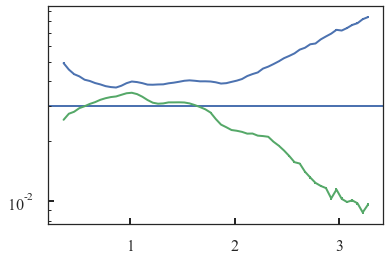

In [247]:
from plotting_general import running_median
r = running_median(jointinputs['GBP'].values-jointinputs['GRP'].values,
                   jointinputs['parallax_error'].values,nbins=60)
plt.errorbar(r[0],r[1],.5*(r[3]-r[2])/np.sqrt(2.*r[-1]))
r2 = running_median(jointinputs['GBP'].values-jointinputs['GRP'].values,
                    joint['par_err'].values,nbins=60)
plt.errorbar(r2[0],r2[1],.5*(r2[3]-r2[2])/np.sqrt(2.*r2[-1]))
plt.semilogy()
plt.axhline(0.03)

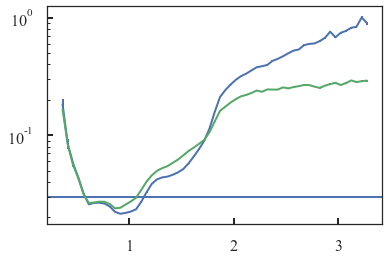

In [249]:
from plotting_general import running_median
r = running_median(jointinputs['GBP'].values-jointinputs['GRP'].values,
                   0.029*joint['dist'].values**2,nbins=60)
plt.errorbar(r[0],r[1],.5*(r[3]-r[2])/np.sqrt(2.*r[-1]))
r2 = running_median(jointinputs['GBP'].values-jointinputs['GRP'].values,
                    joint['dist_err'].values,nbins=60)
plt.errorbar(r2[0],r2[1],.5*(r2[3]-r2[2])/np.sqrt(2.*r2[-1]))
plt.semilogy()
plt.axhline(0.03)

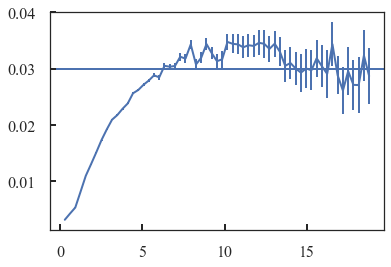

In [273]:
from plotting_general import running_median
r = running_median(joint['dist'].values,
                   joint['par'].values-jointinputs['parallax'].values,nbins=60)
plt.errorbar(r[0],r[1],.5*(r[3]-r[2])/np.sqrt(2.*r[-1]))
# plt.semilogy()
plt.axhline(0.03)

[]

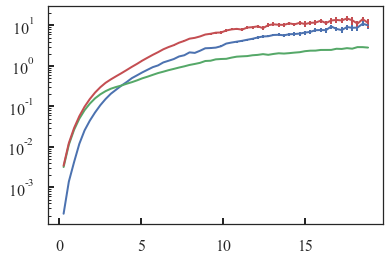

In [279]:
from plotting_general import running_median
r = running_median(joint['dist'].values,
                   (joint['par'].values-jointinputs['parallax'].values)*joint['dist'].values**2,nbins=60)
plt.errorbar(r[0],r[1],.5*(r[3]-r[2])/np.sqrt(2.*r[-1]))
r = running_median(joint['dist'].values,
                   joint['dist_err'].values,nbins=60)
plt.errorbar(r[0],r[1],.5*(r[3]-r[2])/np.sqrt(2.*r[-1]))
r = running_median(joint['dist'].values,
                   jointinputs['parallax_error'].values/jointinputs['parallax']**2,nbins=60)
plt.errorbar(r[0],r[1],.5*(r[3]-r[2])/np.sqrt(2.*r[-1]))
plt.semilogy()
# plt.axhline(0.03)

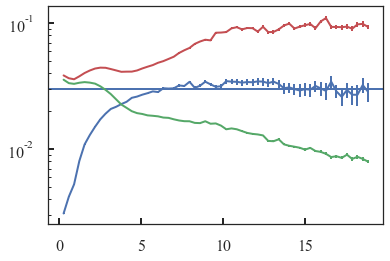

In [281]:
from plotting_general import running_median
r = running_median(joint['dist'].values,
                   (joint['par'].values-jointinputs['parallax'].values),nbins=60)
plt.errorbar(r[0],r[1],.5*(r[3]-r[2])/np.sqrt(2.*r[-1]))
r = running_median(joint['dist'].values,
                   joint['par_err'].values,nbins=60)
plt.errorbar(r[0],r[1],.5*(r[3]-r[2])/np.sqrt(2.*r[-1]))
r = running_median(joint['dist'].values,
                   jointinputs['parallax_error'].values,nbins=60)
plt.errorbar(r[0],r[1],.5*(r[3]-r[2])/np.sqrt(2.*r[-1]))
plt.semilogy()
plt.axhline(0.03)

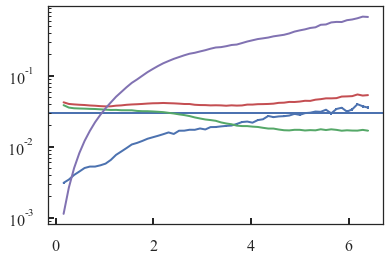

In [287]:
fltr = (np.abs(joint['z'])<0.7)&(joint['R']>8.2)&(joint['Z']>-1.)
from plotting_general import running_median
r = running_median(joint['dist'].values[fltr],
                   (joint['par'].values-jointinputs['parallax'].values)[fltr],nbins=60)
plt.errorbar(r[0],r[1],.5*(r[3]-r[2])/np.sqrt(2.*r[-1]))
r = running_median(joint['dist'].values[fltr],
                   joint['par_err'].values[fltr],nbins=60)
plt.errorbar(r[0],r[1],.5*(r[3]-r[2])/np.sqrt(2.*r[-1]))
r = running_median(joint['dist'].values[fltr],
                   jointinputs['parallax_error'].values[fltr],nbins=60)
plt.errorbar(r[0],r[1],.5*(r[3]-r[2])/np.sqrt(2.*r[-1]))
plt.semilogy()
plt.axhline(0.03)

/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divide
  """Entry point for launching an IPython kernel.
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


[]

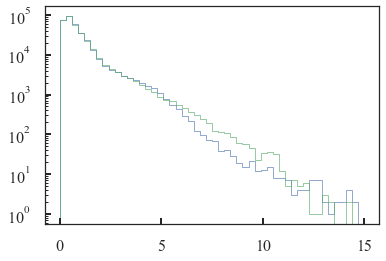

In [313]:
fltr = (np.abs(joint['z'])<0.1)&(joint['R']>8.2)&(joint['Z']>-1.)&(np.abs(jointinputs['parallax_error'].values/jointinputs['parallax'].values)<0.5)

plt.hist(joint['dist'].values[fltr],range=[0.,15.],bins=50,histtype='step');
plt.hist(1./jointinputs['parallax'].values[fltr],range=[0.,15.],bins=50,histtype='step');
plt.semilogy()

In [482]:
rc_fltr = (joint['logg'].values<2.3)&(joint['logg'].values<2.5)
d_fltr = (joint['logg'].values>3.)

/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


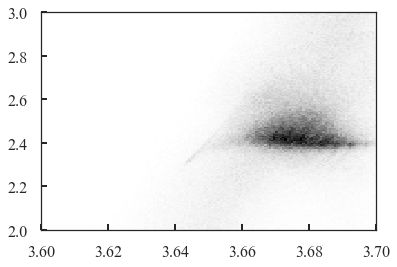

In [460]:
plt.hist2d(joint['log10_teff'].values,joint['logg'].values,range=[[3.6,3.7],[2.,3.]],bins=150);

In [510]:
grvs = pd.read_csv('/data/jls/GaiaDR2/gaia_source_with_rv.csv')

In [571]:
import aa_py
xx = np.array([aa_py.GalacticToPolar(aa_py.EquatorialToGalactic(np.array([ra,dec,s,vr,pmra,pmdec])),np.array([8.2,0.025,11.1,245.,7.25]))
               for ra,dec,s,vr,pmra,pmdec in zip(np.deg2rad(grvs['ra']),np.deg2rad(grvs['dec']),1./grvs['parallax'],
                                              grvs['radial_velocity'],grvs['pmra'],grvs['pmdec'])])

In [755]:
import aa_py
xxS = np.array([aa_py.GalacticToPolar(aa_py.EquatorialToGalactic(np.array([ra,dec,s,vr,pmra,pmdec])),np.array([8.2,0.025,11.1,245.,7.25]))
               for ra,dec,s,vr,pmra,pmdec in zip(np.deg2rad(grvs['ra']),np.deg2rad(grvs['dec']),1./grvs['parallax']+0.029,
                                              grvs['radial_velocity'],grvs['pmra'],grvs['pmdec'])])

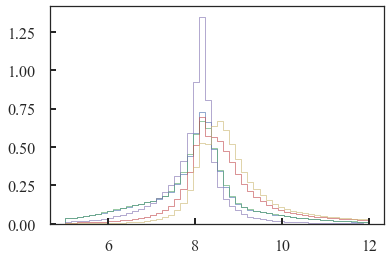

In [802]:
plt.hist(xx.T[0],range=[5.,12.],histtype='step',bins=50,normed=True);
plt.hist(xxS.T[0],range=[5.,12.],histtype='step',bins=50,normed=True);
plt.hist(joint_table['R'],range=[5.,12.],histtype='step',bins=50,normed=True);
plt.hist(joint_table['R'][joint_table['survey']=='RAVEDR5'],range=[5.,12.],histtype='step',bins=50,normed=True);
plt.hist(joint_table['R'][joint_table['survey']=='LAMOST'],range=[5.,12.],histtype='step',bins=50,normed=True);

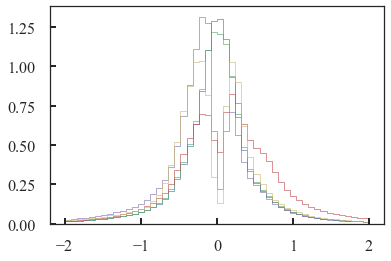

In [798]:
plt.hist(xx.T[2],range=[-2.,2.],histtype='step',bins=50,normed=True);
plt.hist(xxS.T[2],range=[-2.,2.],histtype='step',bins=50,normed=True);
plt.hist(joint_table['z'],range=[-2.,2.],histtype='step',bins=50,normed=True);
plt.hist(joint_table['z'][joint_table['survey']=='RAVEDR5'],range=[-2.,2.],histtype='step',bins=50,normed=True);
plt.hist(joint_table['z'][joint_table['survey']=='GALAH'],range=[-2.,2.],histtype='step',bins=50,normed=True);

[]

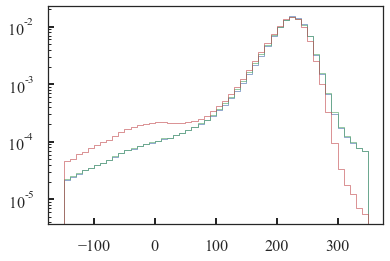

In [808]:
plt.hist(-xx.T[4],range=[-150.,350.],histtype='step',bins=50,normed=True);
plt.hist(-xxS.T[4],range=[-150.,350.],histtype='step',bins=50,normed=True);
plt.hist(joint_table['vphi'],range=[-150.,350.],histtype='step',bins=50,normed=True);
# plt.hist(joint_table['vphi'][joint_table['survey']=='RAVEDR5'],range=[-150.,350.],histtype='step',bins=50,normed=True);
# plt.hist(joint_table['vphi'][joint_table['survey']=='RAVEON'],range=[-150.,350.],histtype='step',bins=50,normed=True);
plt.semilogy()

[]

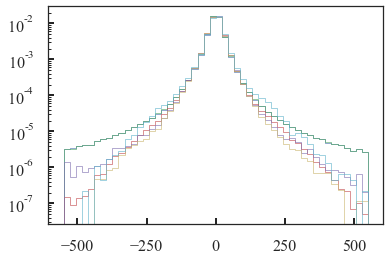

In [819]:
plt.hist(xx.T[5],range=[-550.,550.],histtype='step',bins=50,normed=True);
plt.hist(xxS.T[5],range=[-550.,550.],histtype='step',bins=50,normed=True);
plt.hist(joint_table['vz'],range=[-550.,550.],histtype='step',bins=50,normed=True);
plt.hist(joint_table['vz'][joint_table['survey']=='RAVEDR5'],range=[-550.,550.],histtype='step',bins=50,normed=True);
plt.hist(joint_table['vz'][joint_table['survey']=='RAVEON'],range=[-550.,550.],histtype='step',bins=50,normed=True);
plt.hist(joint_table['vz'][joint_table['survey']=='APOGEE'],range=[-550.,550.],histtype='step',bins=50,normed=True);

plt.semilogy()

/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


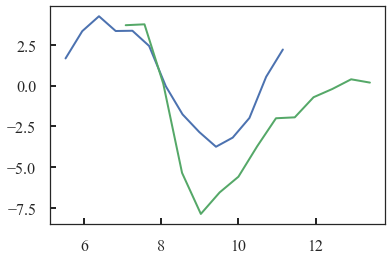

In [573]:
fltr = (grvs.parallax_over_error>5.)&(np.abs(xx.T[2])<0.3)
r = running_median(xx.T[0][fltr],xx.T[3][fltr])
plt.plot(r[0],r[1])
fltr = (np.abs(joint['z'])<0.3)&(joint['Z']>-1.)#&(joint['dist_err'].values/joint['dist'].values<0.3)
r = running_median(joint['R'].values[fltr],joint['vR'].values[fltr])
plt.plot(r[0],r[1])

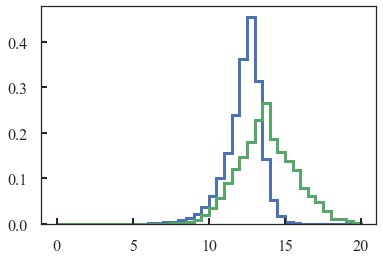

In [722]:
plt.hist(grvs.phot_g_mean_mag,range=[0.,20.],histtype='step',lw=3,bins=40,normed=True);
plt.hist(jointinputs.G.values,range=[0.,20.],histtype='step',lw=3,bins=40,normed=True);

/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


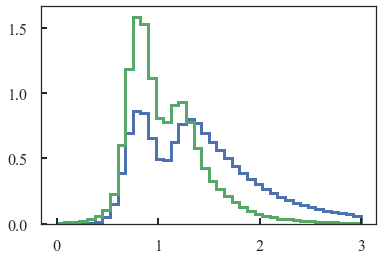

In [735]:
plt.hist(grvs.phot_bp_mean_mag-grvs.phot_rp_mean_mag,range=[0.,3.],histtype='step',lw=3,bins=40,normed=True);
plt.hist((jointinputs.GBP-jointinputs.GRP)[jointinputs.G.values<14.],range=[0.,3.],histtype='step',lw=3,bins=40,normed=True);

/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


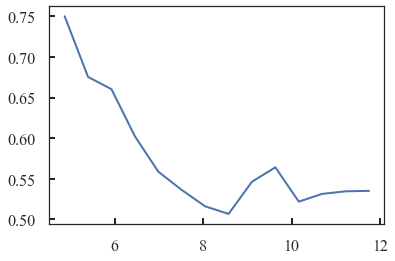

In [780]:
fltr = (grvs.parallax_over_error>5.)&(np.abs(xx.T[2])<0.7)&(np.abs(xx.T[2])>0.3)&(np.abs(xx.T[1])<0.02)&(grvs.phot_g_mean_mag<14.)&(grvs.phot_bp_mean_mag-grvs.phot_rp_mean_mag>1.)
r = running_median(xx.T[0][fltr],xx.T[3][fltr])
r2 = running_median(xx.T[0][fltr],xx.T[5][fltr])
plt.plot(r[0],(r2[3]-r2[2])/(r[3]-r[2]))

/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.
/home/jls/.local/lib/python2.7/site-packages/ipyk

<ErrorbarContainer object of 3 artists>

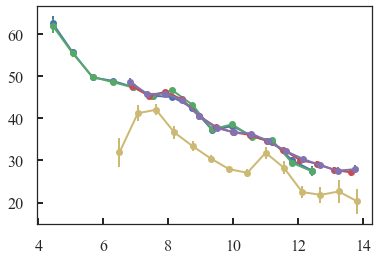

In [789]:
fltr = (grvs.parallax_over_error>3.)&(np.abs(xx.T[2])<0.7)&(np.abs(xx.T[2])>0.3)&(np.abs(xx.T[1])<0.02)&(grvs.phot_g_mean_mag<14.)&(grvs.phot_bp_mean_mag-grvs.phot_rp_mean_mag>1.)
r = running_median(xx.T[0][fltr],xx.T[3][fltr])
plt.errorbar(r[0],.5*(r[3]-r[2]),.5*(r[3]-r[2])/np.sqrt(2.*r[-1]),fmt='.-')

fltr = (grvs.parallax_over_error>3.)&(np.abs(xxS.T[2])<0.7)&(np.abs(xxS.T[2])>0.3)&(np.abs(xxS.T[1])<0.02)&(grvs.phot_g_mean_mag<14.)&(grvs.phot_bp_mean_mag-grvs.phot_rp_mean_mag>1.)
r = running_median(xxS.T[0][fltr],xxS.T[3][fltr])
plt.errorbar(r[0],.5*(r[3]-r[2]),.5*(r[3]-r[2])/np.sqrt(2.*r[-1]),fmt='.-')

# plt.plot(r[0],.5*(r[3]-r[2]))
fltr = (np.abs(joint['z'])>0.3)&(np.abs(joint['z'])<0.7)&(joint['Z']>-1.)&(np.abs(joint['phi'].values)<0.02)&(jointinputs['GBP'].values-jointinputs['GRP'].values>1.)#&(jointinputs['G'].values<14.)&(joint['dist_err'].values/joint['dist'].values<0.2)
r = running_median(joint['R'].values[fltr],joint['vR'].values[fltr])
plt.errorbar(r[0],.5*(r[3]-r[2]),.5*(r[3]-r[2])/np.sqrt(2.*r[-1]),fmt='.-')


fltr = (np.abs(joint['z'])>0.3)&(np.abs(joint['z'])<0.7)&(joint['Z']>-1.)&(joint['log10_age']>0.)&(np.abs(joint['phi'].values)<0.02)&(jointinputs['GBP'].values-jointinputs['GRP'].values>1.)#&(jointinputs['G'].values<14.)&(joint['dist_err'].values/joint['dist'].values<0.2)
r = running_median(joint['R'].values[fltr],joint['vR'].values[fltr])
plt.errorbar(r[0],.5*(r[3]-r[2]),.5*(r[3]-r[2])/np.sqrt(2.*r[-1]),fmt='.-')



fltr = (np.abs(joint['z'])>0.3)&(np.abs(joint['z'])<0.7)&(joint['Z']>-1.)&(joint['log10_age_err']<0.2)&(joint['log10_age']<0.4)&(joint['log10_age']>0.2)&(np.abs(joint['phi'].values)<0.02)&(jointinputs['GBP'].values-jointinputs['GRP'].values>1.)#&(jointinputs['G'].values<14.)&(joint['dist_err'].values/joint['dist'].values<0.2)
r = running_median(joint['R'].values[fltr],joint['vR'].values[fltr])
plt.errorbar(r[0],.5*(r[3]-r[2]),.5*(r[3]-r[2])/np.sqrt(2.*r[-1]),fmt='.-')


# fltr = (np.abs(joint['z'])>0.6)&(np.abs(joint['z'])<0.7)&(joint['Z']>0.)&(joint['log10_age']>0.55)&(jointinputs['G'].values<14.)&(joint['dist_err'].values/joint['dist'].values<0.3)
# r = running_median(joint['R'].values[fltr],joint['vz'].values[fltr])
# plt.errorbar(r[0],.5*(r[3]-r[2]),.5*(r[3]-r[2])/np.sqrt(2.*r[-1]),fmt='.-')

# fltr = (np.abs(joint['z'])>0.5)&(np.abs(joint['z'])<0.7)&(joint['Z']>0.2)&(joint['Z']<0.4)&(joint['log10_age']>0.4)&(joint['log10_age']<0.6)&(joint['dist_err'].values/joint['dist'].values<0.3)
# r = running_median(joint['R'].values[fltr],joint['vz'].values[fltr])
# plt.errorbar(r[0],.5*(r[3]-r[2]),.5*(r[3]-r[2])/np.sqrt(2.*r[-1]),fmt='.-')
# fltr = (np.abs(joint['z'])>0.5)&(np.abs(joint['z'])<0.7)&(joint['Z']<0.2)&(joint['Z']>0.)&(joint['log10_age']>0.4)&(joint['log10_age']<0.6)&(joint['dist_err'].values/joint['dist'].values<0.3)
# r = running_median(joint['R'].values[fltr],joint['vz'].values[fltr])
# plt.errorbar(r[0],.5*(r[3]-r[2]),.5*(r[3]-r[2])/np.sqrt(2.*r[-1]),fmt='.-')

# fltr = (np.abs(joint['z'])>0.5)&(np.abs(joint['z'])<0.7)&(joint['Z']>-1.)&(joint['log10_age']<0.4)#&(joint['dist_err'].values/joint['dist'].values<0.3)
# r = running_median(joint['R'].values[fltr],joint['vR'].values[fltr])
# plt.errorbar(r[0],.5*(r[3]-r[2]),.5*(r[3]-r[2])/np.sqrt(2.*r[-1]),fmt='.-')
# plt.semilogy()

/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.
/home/jls/.local/lib/python2.7/site-packages/ipyk

<ErrorbarContainer object of 3 artists>

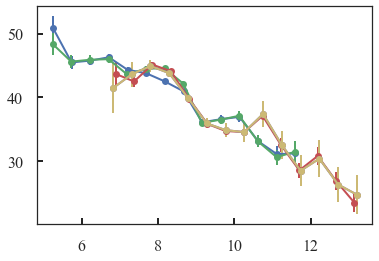

In [776]:
fltr = (grvs.parallax_over_error>5.)&(np.abs(xx.T[2])<0.4)&(np.abs(xx.T[2])>0.3)&(np.abs(xx.T[1])<0.02)&(grvs.phot_g_mean_mag<14.)&(grvs.phot_bp_mean_mag-grvs.phot_rp_mean_mag>1.)
r = running_median(xx.T[0][fltr],xx.T[3][fltr])
plt.errorbar(r[0],.5*(r[3]-r[2]),.5*(r[3]-r[2])/np.sqrt(2.*r[-1]),fmt='.-')

fltr = (grvs.parallax_over_error>5.)&(np.abs(xxS.T[2])<0.4)&(np.abs(xxS.T[2])>0.3)&(np.abs(xxS.T[1])<0.02)&(grvs.phot_g_mean_mag<14.)&(grvs.phot_bp_mean_mag-grvs.phot_rp_mean_mag>1.)
r = running_median(xxS.T[0][fltr],xxS.T[3][fltr])
plt.errorbar(r[0],.5*(r[3]-r[2]),.5*(r[3]-r[2])/np.sqrt(2.*r[-1]),fmt='.-')

# plt.plot(r[0],.5*(r[3]-r[2]))
fltr = (np.abs(joint['z'])>0.3)&(np.abs(joint['z'])<0.4)&(joint['Z']>-1.)&(np.abs(joint['phi'].values)<0.02)&(jointinputs['GBP'].values-jointinputs['GRP'].values>1.)&(jointinputs['G'].values<15.)&(joint['dist_err'].values/joint['dist'].values<0.6)
r = running_median(joint['R'].values[fltr],joint['vR'].values[fltr])
plt.errorbar(r[0],.5*(r[3]-r[2]),.5*(r[3]-r[2])/np.sqrt(2.*r[-1]),fmt='.-')


fltr = (np.abs(joint['z'])>0.3)&(np.abs(joint['z'])<0.4)&(joint['Z']>-1.)&(joint['log10_age']>-0.5)&(np.abs(joint['phi'].values)<0.02)&(jointinputs['GBP'].values-jointinputs['GRP'].values>1.)&(jointinputs['G'].values<15.)&(joint['dist_err'].values/joint['dist'].values<0.6)
r = running_median(joint['R'].values[fltr],joint['vR'].values[fltr])
plt.errorbar(r[0],.5*(r[3]-r[2]),.5*(r[3]-r[2])/np.sqrt(2.*r[-1]),fmt='.-')
plt.errorbar(r[0],.5*(r[3]-r[2]),.5*(r[3]-r[2])/np.sqrt(.5*r[-1]),fmt='.-')

/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


[]

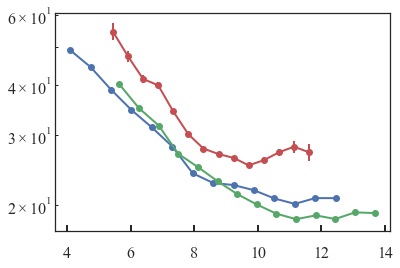

In [670]:
fltr = (grvs.parallax_over_error>5.)&(np.abs(xx.T[2])<0.7)&(np.abs(xx.T[2])>0.5)
r = running_median(xx.T[0][fltr],xx.T[5][fltr])
plt.errorbar(r[0],.5*(r[3]-r[2]),.5*(r[3]-r[2])/np.sqrt(2.*r[-1]),fmt='.-')
# plt.plot(r[0],.5*(r[3]-r[2]))
fltr = (np.abs(joint['z'])>0.5)&(np.abs(joint['z'])<0.7)&(joint['Z']>-1.)&(joint['log10_age']>0.5)&(joint['dist_err'].values/joint['dist'].values<0.3)
r = running_median(joint['R'].values[fltr],joint['vz'].values[fltr])
plt.errorbar(r[0],.5*(r[3]-r[2]),.5*(r[3]-r[2])/np.sqrt(2.*r[-1]),fmt='.-')

fltr = (np.abs(joint['z'])>0.5)&(np.abs(joint['z'])<0.7)&(joint['Z']>-1.)&(joint['log10_age']>0.9)#&(joint['dist_err'].values/joint['dist'].values<0.3)
r = running_median(joint['R'].values[fltr],joint['vz'].values[fltr])
plt.errorbar(r[0],.5*(r[3]-r[2]),.5*(r[3]-r[2])/np.sqrt(2.*r[-1]),fmt='.-')
plt.semilogy()

/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


<ErrorbarContainer object of 3 artists>

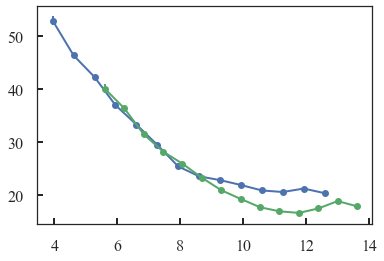

In [641]:
fltr = (grvs.parallax_over_error>5.)&(np.abs(xx.T[2])<0.7)&(np.abs(xx.T[2])>0.6)
r = running_median(xx.T[0][fltr],xx.T[5][fltr])
plt.errorbar(r[0],.5*(r[3]-r[2]),.5*(r[3]-r[2])/np.sqrt(2.*r[-1]),fmt='.-')
# plt.plot(r[0],.5*(r[3]-r[2]))
fltr = (np.abs(joint['z'])>0.6)&(np.abs(joint['z'])<0.7)&(joint['Z']>-1.)#&(joint['dist_err'].values/joint['dist'].values<0.3)
r = running_median(joint['R'].values[fltr],joint['vz'].values[fltr])
plt.errorbar(r[0],.5*(r[3]-r[2]),.5*(r[3]-r[2])/np.sqrt(2.*r[-1]),fmt='.-')

/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


<ErrorbarContainer object of 3 artists>

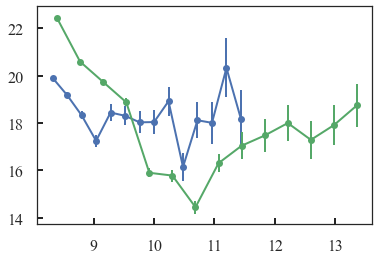

In [626]:
fltr = (grvs.parallax_over_error>5.)&(np.abs(xx.T[2])<0.4)&(np.abs(xx.T[2])>0.3)&(np.abs(xx.T[1])<0.02)&(xx.T[0]>8.2)
r = running_median(xx.T[0][fltr],xx.T[5][fltr])
plt.errorbar(r[0],.5*(r[3]-r[2]),.5*(r[3]-r[2])/np.sqrt(2.*r[-1]),fmt='.-')
# plt.plot(r[0],.5*(r[3]-r[2]))
fltr = (np.abs(joint['z'])>0.3)&(np.abs(joint['z'])<0.4)&(np.abs(joint['phi'])<0.02)&(joint['R']>8.2)&(joint['Z']>-1.)#&(joint['dist_err'].values/joint['dist'].values<0.2)
r = running_median(joint['R'].values[fltr],joint['vz'].values[fltr])
plt.errorbar(r[0],.5*(r[3]-r[2]),.5*(r[3]-r[2])/np.sqrt(2.*r[-1]),fmt='.-')
# plt.ylim(15.,30.)

# fltr = (grvs.parallax_over_error>4.)&(np.abs(xx.T[2])<0.4)&(np.abs(xx.T[2])>0.3)&(np.abs(xx.T[1])<0.02)
# r = running_median(xx.T[0][fltr],xx.T[5][fltr])
# plt.errorbar(r[0],.5*(r[3]-r[2]),.5*(r[3]-r[2])/np.sqrt(2.*r[-1]),fmt='.-')
# # plt.plot(r[0],.5*(r[3]-r[2]))
# fltr = (np.abs(joint['z'])>0.3)&(np.abs(joint['z'])<0.4)&(np.abs(joint['phi'])<0.02)&(joint['Z']>-1.)&(joint['dist_err'].values/joint['dist'].values<0.2)
# r = running_median(joint['R'].values[fltr],joint['vz'].values[fltr])
# plt.errorbar(r[0],.5*(r[3]-r[2]),.5*(r[3]-r[2])/np.sqrt(2.*r[-1]),fmt='.-')
# # plt.ylim(15.,30.)

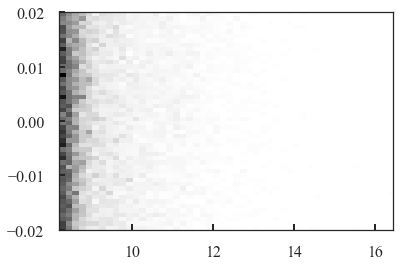

In [622]:
plt.hist2d(xx.T[0][fltr],xx.T[1][fltr],bins=50);

/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


<ErrorbarContainer object of 3 artists>

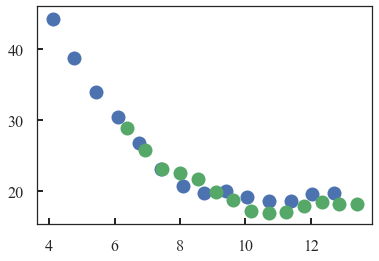

In [589]:
fltr = (grvs.parallax_over_error>3.)&(np.abs(xx.T[2])<0.5)&(np.abs(xx.T[2])>0.3)
r = running_median(xx.T[0][fltr],xx.T[5][fltr])
plt.errorbar(r[0],.5*(r[3]-r[2]),.5*(r[3]-r[2])/np.sqrt(2.*r[-1]),fmt='o')
# plt.plot(r[0],.5*(r[3]-r[2]))
fltr = (np.abs(joint['z'])>0.3)&(np.abs(joint['z'])<0.5)&(joint['Z']>-1.)&(joint['dist_err'].values/joint['dist'].values<0.3)
r = running_median(joint['R'].values[fltr],joint['vz'].values[fltr])
plt.errorbar(r[0],.5*(r[3]-r[2]),.5*(r[3]-r[2])/np.sqrt(2.*r[-1]),fmt='o')

/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


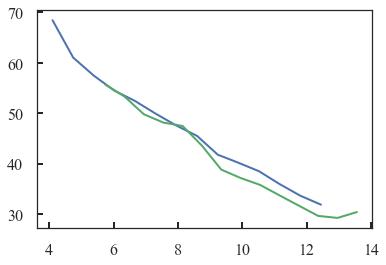

In [580]:
fltr = (grvs.parallax_over_error>5.)&(np.abs(xx.T[2])<0.7)&(np.abs(xx.T[2])>0.5)
r = running_median(xx.T[0][fltr],xx.T[3][fltr])
plt.plot(r[0],.5*(r[3]-r[2]))
fltr = (np.abs(joint['z'])>0.5)&(np.abs(joint['z'])<0.7)&(joint['Z']>-1.)&(joint['dist_err'].values/joint['dist'].values<0.3)
r = running_median(joint['R'].values[fltr],joint['vR'].values[fltr])
plt.plot(r[0],.5*(r[3]-r[2]))

/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


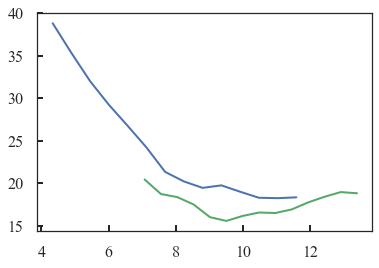

In [538]:
fltr = (grvs.parallax_over_error>5.)&(np.abs(xx.T[2])<0.5)&(np.abs(xx.T[2])>0.3)
r = running_median(xx.T[0][fltr],xx.T[-1][fltr])
plt.plot(r[0],.5*(r[3]-r[2]))
fltr = (np.abs(joint['z'])<0.3)&(np.abs(joint['z'])<0.5)&(joint['Z']>-1.)#&(joint['dist_err'].values/joint['dist'].values<0.2)
r = running_median(joint['R'].values[fltr],joint['vz'].values[fltr])
plt.plot(r[0],.5*(r[3]-r[2]))

/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in divide
  # Remove the CWD from sys.path while we load stuff.
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in less


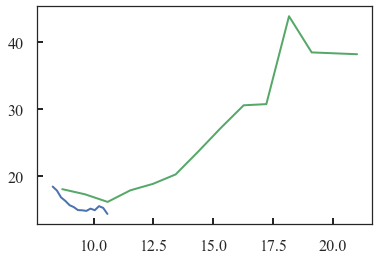

In [499]:
# fltr = (np.abs(joint['z'])<0.7)&(joint['R']>8.2)&(joint['Z']>-1.)&(joint['APOGEE_ID']==joint['APOGEE_ID'])&(np.abs(jointinputs['parallax_error'].values/jointinputs['parallax'].values)<.1)
# r = running_median(joint['s'].values[fltr],joint['mu_b'].values[fltr]*4.74*joint['s'].values[fltr])
# plt.plot(r[0],.5*(r[3]-r[2]))
# r = running_median(joint['s'].values[fltr],joint['mu_b'].values[fltr]*4.74/jointinputs['parallax'].values[fltr])
# plt.plot(r[0],.5*(r[3]-r[2]))

# r = running_median(joint['s'].values[fltr],joint['vz'].values[fltr])
# plt.plot(r[0],.5*(r[3]-r[2]))

fltr = (np.abs(joint['z'])<0.2)&(joint['R']>8.2)&(joint['Z']>-1.)&(np.abs(jointinputs['parallax_error'].values/jointinputs['parallax'].values)<.2)

fltr = (np.abs(joint['z'])<0.3)&(joint['R']>8.2)&(joint['Z']>-1.)&(joint['dist_err'].values/joint['dist'].values<0.1)

fltr &= d_fltr

r = running_median(joint['R'].values[fltr],joint['vz'].values[fltr])
plt.plot(r[0],.5*(r[3]-r[2]))


fltr = (np.abs(joint['z'])<0.3)&(joint['R']>8.2)&(joint['Z']>-1.)&(joint['dist_err'].values/joint['dist'].values<0.1)

fltr &= rc_fltr

r = running_median(joint['R'].values[fltr],joint['vz'].values[fltr])
plt.plot(r[0],.5*(r[3]-r[2]))


# r = running_median(joint['R'].values[fltr],joint['vz'].values[fltr])
# plt.plot(r[0],.5*(r[3]-r[2]))

# r = running_median(joint['R'].values[fltr],joint['mu_b'].values[fltr]*4.74*joint['s'].values[fltr])
# plt.plot(r[0],.5*(r[3]-r[2]))


# r = running_median(joint['R'].values[fltr],joint['mu_b'].values[fltr]*4.74/(jointinputs['parallax'].values[fltr]+0.029))
# plt.plot(r[0],.5*(r[3]-r[2]))


# r = running_median(joint['R'].values[fltr],joint['mu_b'].values[fltr]*4.74/(jointinputs['parallax'].values[fltr]+0.05))
# plt.plot(r[0],.5*(r[3]-r[2]))

# fltr = (np.abs(joint['z'])<0.2)&(joint['R']>8.2)&(joint['Z']>-1.)&(np.abs(jointinputs['parallax_error'].values/jointinputs['parallax'].values)<.2)

# r = running_median(1./jointinputs['parallax'].values[fltr],joint['mu_b'].values[fltr]*4.74/jointinputs['parallax'].values[fltr])
# plt.plot(r[0],.5*(r[3]-r[2]))

# r = running_median(1./(jointinputs['parallax'].values[fltr]+0.029),joint['mu_b'].values[fltr]*4.74/(jointinputs['parallax'].values[fltr]+0.029))
# plt.plot(r[0],.5*(r[3]-r[2]))

# r = running_median(joint['s'].values[fltr],joint['vz'].values[fltr])
# plt.plot(r[0],.5*(r[3]-r[2]))


# fltr = (np.abs(joint['z'])<0.7)&(joint['R']>8.2)&(joint['Z']>-1.)&(np.abs(jointinputs['parallax_error'].values/jointinputs['parallax'].values)<.3)
# r = running_median(joint['s'].values[fltr],joint['mu_b'].values[fltr]*4.74*joint['s'].values[fltr])
# plt.plot(r[0],.5*(r[3]-r[2]))

# r = running_median(joint['s'].values[fltr],joint['vz'].values[fltr])
# plt.plot(r[0],.5*(r[3]-r[2]))



# fltr = (np.abs(joint['z'])<0.7)&(joint['R']>8.2)&(joint['Z']>-1.)&(np.abs(jointinputs['parallax_error'].values/jointinputs['parallax'].values)<1.)
# r = running_median(joint['s'].values[fltr],joint['mu_b'].values[fltr]*4.74*joint['s'].values[fltr])
# plt.plot(r[0],.5*(r[3]-r[2]))


# r = running_median(joint['s'].values[fltr],joint['vz'].values[fltr])
# plt.plot(r[0],.5*(r[3]-r[2]))

# r = running_median(1./(1./joint['s'].values[fltr]+0.03),joint['mu_b'].values[fltr]*4.74/(1./joint['s'].values[fltr]+0.03))
# plt.plot(r[0],.5*(r[3]-r[2]))


# r = running_median(1./(1./joint['s'].values[fltr]+0.05),joint['mu_b'].values[fltr]*4.74/(1./joint['s'].values[fltr]+0.05))
# plt.plot(r[0],.5*(r[3]-r[2]))

# r = running_median(1./jointinputs['parallax'].values[fltr],joint['mu_b'].values[fltr]*4.74/jointinputs['parallax'].values[fltr])
# plt.plot(r[0],.5*(r[3]-r[2]))


# r = running_median(1./(jointinputs['parallax'].values[fltr]+0.029),
#                    joint['mu_b'].values[fltr]*4.74/(jointinputs['parallax'].values[fltr]+0.029))
# plt.plot(r[0],.5*(r[3]-r[2]))


/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divide
  """Entry point for launching an IPython kernel.
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in divide
  if sys.path[0] == '':
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in less


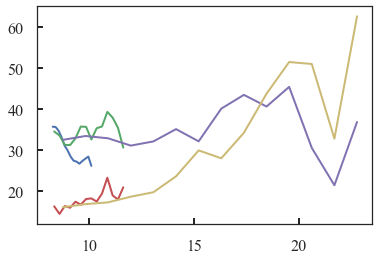

In [506]:
fltr = (np.abs(joint['z'])<0.2)&(joint['R']>8.2)&(joint['Z']>-1.)&(np.abs(joint['phi'].values<0.01))&(np.abs(jointinputs['parallax_error'].values/jointinputs['parallax'].values)<.1)

# fltr = (np.abs(joint['z'])<0.6)&(joint['R']>8.2)&(joint['Z']>-1.)&(np.abs(joint['phi'].values<0.01))&(joint['dist_err'].values/joint['dist'].values<0.05)

fltr &= d_fltr

r = running_median(joint['R'].values[fltr],joint['vR'].values[fltr])
plt.plot(r[0],.5*(r[3]-r[2]))


# fltr = (np.abs(joint['z'])<0.6)&(joint['R']>8.2)&(joint['Z']>-1.)&(joint['dist_err'].values/joint['dist'].values<0.05)
fltr = (np.abs(joint['z'])<0.2)&(joint['R']>8.2)&(joint['Z']>-1.)&(np.abs(joint['phi'].values<0.01))&(np.abs(jointinputs['parallax_error'].values/jointinputs['parallax'].values)<.1)

fltr &= rc_fltr

r = running_median(joint['R'].values[fltr],joint['vR'].values[fltr])
plt.plot(r[0],.5*(r[3]-r[2]))

r = running_median(joint['R'].values[fltr],joint['mu_b'].values[fltr]*4.74*joint['s'].values[fltr])
plt.plot(r[0],.5*(r[3]-r[2]))

fltr = (np.abs(joint['z'])<0.2)&(joint['R']>8.2)&(joint['Z']>-1.)&(np.abs(joint['phi'].values<0.01))&(joint['dist_err'].values/joint['dist'].values<0.05)
# fltr = (np.abs(joint['z'])<0.2)&(joint['R']>8.2)&(joint['Z']>-1.)&(np.abs(joint['phi'].values<0.01))&(np.abs(jointinputs['parallax_error'].values/jointinputs['parallax'].values)<.1)

fltr &= rc_fltr

r = running_median(joint['R'].values[fltr],joint['vR'].values[fltr])
plt.plot(r[0],.5*(r[3]-r[2]))

r = running_median(joint['R'].values[fltr],joint['mu_b'].values[fltr]*4.74*joint['s'].values[fltr])
plt.plot(r[0],.5*(r[3]-r[2]))

/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divide
  """Entry point for launching an IPython kernel.
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


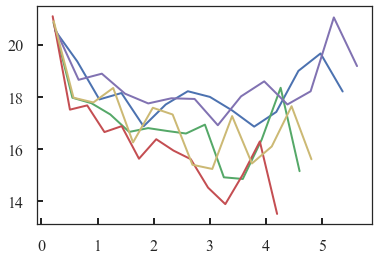

In [371]:
fltr = (np.abs(joint['z'])<0.1)&(joint['R']>8.2)&(joint['Z']>-1.)&(joint['log10_age_err']<0.2)&(joint['APOGEE_ID']==joint['APOGEE_ID'])&(np.abs(jointinputs['parallax_error'].values/jointinputs['parallax'].values)<.2)
r = running_median(joint['s'].values[fltr],joint['mu_b'].values[fltr]*4.74*joint['s'].values[fltr])
plt.plot(r[0],.5*(r[3]-r[2]))

r = running_median(1./(1./joint['s'].values[fltr]+0.03),joint['mu_b'].values[fltr]*4.74/(1./joint['s'].values[fltr]+0.03))
plt.plot(r[0],.5*(r[3]-r[2]))


r = running_median(1./(1./joint['s'].values[fltr]+0.05),joint['mu_b'].values[fltr]*4.74/(1./joint['s'].values[fltr]+0.05))
plt.plot(r[0],.5*(r[3]-r[2]))

r = running_median(1./jointinputs['parallax'].values[fltr],joint['mu_b'].values[fltr]*4.74/jointinputs['parallax'].values[fltr])
plt.plot(r[0],.5*(r[3]-r[2]))


r = running_median(1./(jointinputs['parallax'].values[fltr]+0.029),
                   joint['mu_b'].values[fltr]*4.74/(jointinputs['parallax'].values[fltr]+0.029))
plt.plot(r[0],.5*(r[3]-r[2]))


/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divide
  """Entry point for launching an IPython kernel.
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in divide
  # This is added back by InteractiveShellApp.init_path()


(10.0, 30.0)

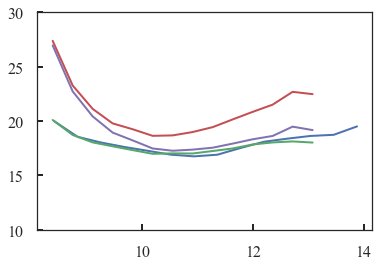

In [348]:
fltr = (np.abs(joint['z'])<0.7)&(joint['R']>8.2)&(joint['Z']>-1.)&(np.abs(jointinputs['parallax_error'].values/jointinputs['parallax'].values)<1.6)

fltr = (np.abs(joint['z'])<0.7)&(joint['R']>8.2)&(joint['Z']>-1.)&(np.abs(joint['dist_err']/joint['dist'])<0.5)
r = running_median(joint['R'].values[fltr],joint['vz'].values[fltr])
plt.plot(r[0],.5*(r[3]-r[2]))

fltr = (np.abs(joint['z'])<0.7)&(joint['R']>8.2)&(joint['Z']>-1.)&(np.abs(joint['dist_err']/joint['dist'])<0.1)
r = running_median(joint['R'].values[fltr],joint['vz'].values[fltr])
plt.plot(r[0],.5*(r[3]-r[2]))

r = running_median(joint['R'].values[fltr],joint['mu_b'].values[fltr]*4.74/jointinputs['parallax'].values[fltr])
plt.plot(r[0],.5*(r[3]-r[2]))
r = running_median(joint['R'].values[fltr],joint['mu_b'].values[fltr]*4.74/(jointinputs['parallax'].values[fltr]+0.029))
plt.plot(r[0],.5*(r[3]-r[2]))
plt.ylim(10.,30.)

[]

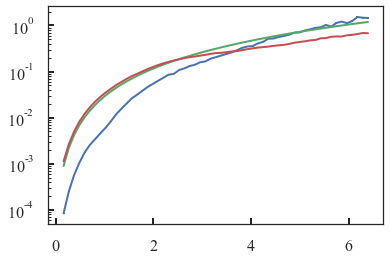

In [290]:
fltr = (np.abs(joint['z'])<0.7)&(joint['R']>8.2)&(joint['Z']>-1.)
from plotting_general import running_median
r = running_median(joint['dist'].values[fltr],
                   ((joint['par'].values-jointinputs['parallax'].values)*(joint['dist']**2))[fltr],nbins=60)
plt.errorbar(r[0],r[1],.5*(r[3]-r[2])/np.sqrt(2.*r[-1]))

r = running_median(joint['dist'].values[fltr],
                   (0.029*(joint['dist']**2))[fltr],nbins=60)
plt.errorbar(r[0],r[1],.5*(r[3]-r[2])/np.sqrt(2.*r[-1]))
# r = running_median(joint['dist'].values[fltr],
#                    joint['par_err'].values[fltr],nbins=60)
# plt.errorbar(r[0],r[1],.5*(r[3]-r[2])/np.sqrt(2.*r[-1]))
r = running_median(joint['dist'].values[fltr],
                   joint['dist_err'].values[fltr],nbins=60)
plt.errorbar(r[0],r[1],.5*(r[3]-r[2])/np.sqrt(2.*r[-1]))
plt.semilogy()
# plt.axhline(0.03)

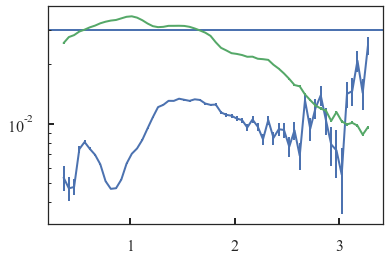

In [248]:
from plotting_general import running_median
r = running_median(jointinputs['GBP'].values-jointinputs['GRP'].values,
                   joint['par'].values-jointinputs['parallax'].values,nbins=60)
plt.errorbar(r[0],r[1],.5*(r[3]-r[2])/np.sqrt(2.*r[-1]))
r2 = running_median(jointinputs['GBP'].values-jointinputs['GRP'].values,
                    joint['par_err'].values,nbins=60)
plt.errorbar(r2[0],r2[1],.5*(r2[3]-r2[2])/np.sqrt(2.*r2[-1]))
plt.semilogy()
plt.axhline(0.03)

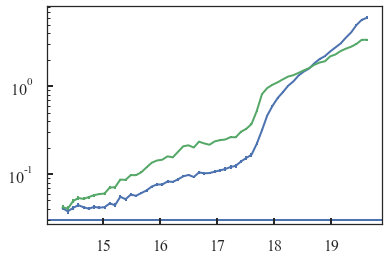

In [221]:
from plotting_general import running_median
r = running_median(segue_inputs['G'],0.029*segue['dist']**2,nbins=60)
plt.errorbar(r[0],r[1],.5*(r[3]-r[2])/np.sqrt(2.*r[-1]))
r2 = running_median(segue_inputs['G'],segue['dist_err'],nbins=60)
plt.errorbar(r2[0],r2[1],.5*(r2[3]-r2[2])/np.sqrt(2.*r2[-1]))
plt.semilogy()
plt.axhline(0.03)

<ErrorbarContainer object of 3 artists>

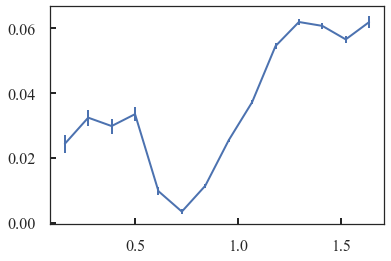

In [196]:
from plotting_general import running_median
r = running_median(segue_inputs['GBP']-segue_inputs['GRP'],segue['par']-segue_inputs['parallax'])
plt.errorbar(r[0],r[1],.5*(r[3]-r[2])/np.sqrt(2.*r[-1]))

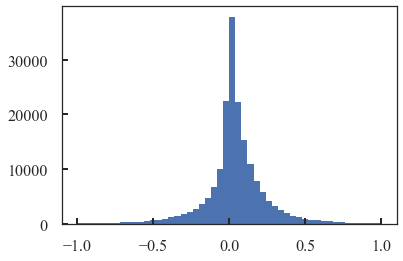

In [190]:
plt.hist(segue['par']-segue_inputs['parallax'],range=[-1.,],bins=50);

In [238]:
np.nanmedian(joint.par.values-jointinputs.parallax.values)

0.007641753980337729

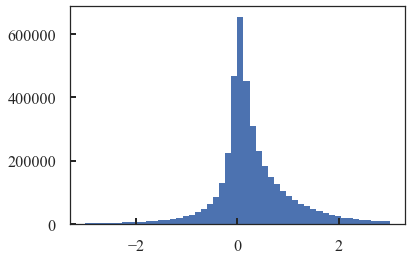

In [236]:
plt.hist((joint.par.values-jointinputs.parallax.values)/np.sqrt(jointinputs.parallax_error.values**2+joint.par_err.values**2),
         range=[-3.,3.],bins=50);
# plt.axvline(np.nanmedian(joint.par.values-jointinputs.parallax.values))

0.02068422785327318


/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


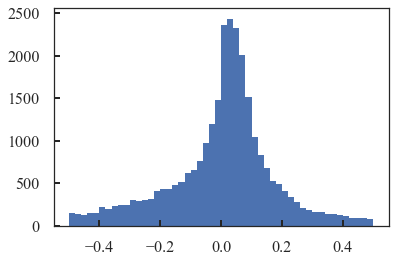

In [271]:
plt.hist((joint.par.values-jointinputs.parallax.values)[(joint['dist'].values>15.)],
         range=[-0.5,0.5],bins=50);
print np.nanmedian((joint.par.values-jointinputs.parallax.values)[(joint['dist'].values>15.)])

/home/jls/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


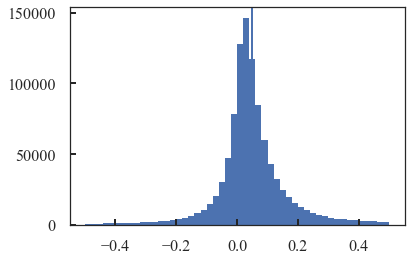

In [257]:
plt.hist((joint.par.values-jointinputs.parallax.values)[(jointinputs.parallax.values/jointinputs.parallax_error.values<10.)],
         range=[-0.5,0.5],bins=50);
plt.axvline(0.05)

In [35]:
joint['delta_par']=joint['par']-jointinputs['parallax']
gen_fast_map_fld(joint,
                 'delta_par',nside=4,vmin=-0.03,vmax=0.03,cmap=plt.cm.RdBu_r)

KeyboardInterrupt: 

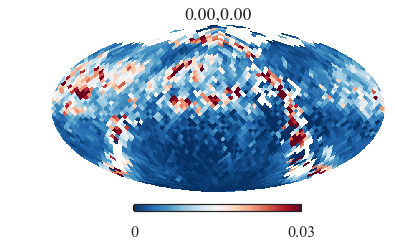

In [651]:
joint['delta_par']=joint['par']-jointinputs['parallax']
joint['ra']=jointinputs['ra']
joint['dec']=jointinputs['dec']
gen_fast_map_fld_radec(joint,
                 'delta_par',nside=16,vmin=0.,vmax=0.03,cmap=plt.cm.RdBu_r)

In [636]:
jj = Table.read('/data/jls/GaiaDR2/spectro/LAMOST_distances_MASTER.hdf5')

In [631]:
jj2 = pd.read_hdf('/data/jls/GaiaDR2/spectro/LAMOST_input_MASTER.hdf5')

In [637]:
jj = jj.to_pandas()

In [638]:
jj = pd.merge(jj[jj.source_id>0.],jj2[jj2.source_id>0.],on='source_id')

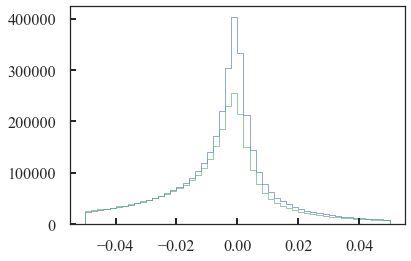

In [645]:
plt.hist(jj.parallax-jj.par,range=[-0.05,0.05],bins=50,histtype='step');
plt.hist(jointinputs.parallax-joint.par,range=[-0.05,0.05],bins=50,histtype='step');

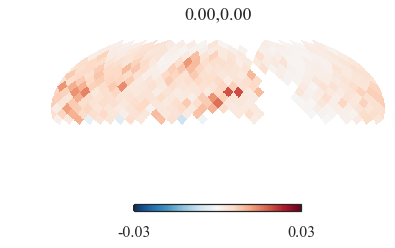

In [646]:
jj['delta_par']=jj['par']-jj['parallax']
gen_fast_map_fld_radec(jj,
                 'delta_par',nside=8,vmin=-0.03,vmax=0.03,cmap=plt.cm.RdBu_r)

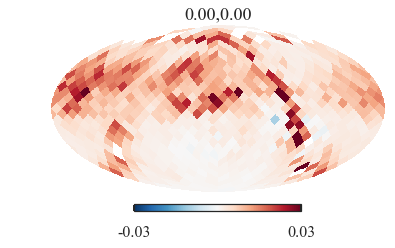

In [648]:
joint['delta_par']=joint['par']-jointinputs['parallax']
gen_fast_map_fld_radec(joint,
                 'delta_par',nside=8,vmin=-0.03,vmax=0.03,cmap=plt.cm.RdBu_r)

[]

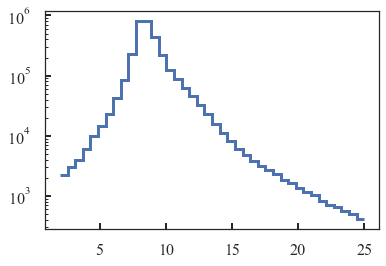

In [336]:
plt.hist(joint_table[joint_table['best']==1]['R'],range=[2.,25.],histtype='step',lw=3,bins=40);
plt.semilogy()

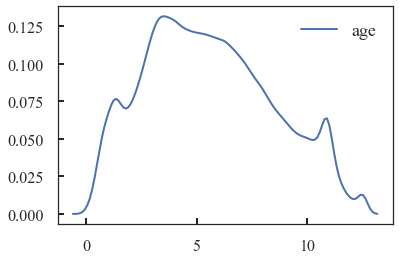

In [373]:
sns.kdeplot(joint_table[(joint_table['best']==1)&(joint_table['log10_age_err']<0.3)&(giants(joint_table))]['age'])
# plt.semilogy()

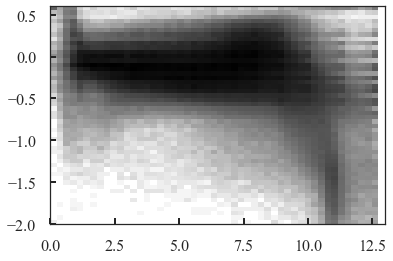

In [398]:
plt.hist2d(joint_table['age'][(joint_table['best']==1)&(joint_table['log10_age_err']<0.2)&(joint_table['survey']=='LAMOST')],
           joint_table['Z'][(joint_table['best']==1)&(joint_table['log10_age_err']<0.2)&(joint_table['survey']=='LAMOST')],
           bins=50,range=[[0.,13.],[-2.,0.6]],norm=LogNorm());

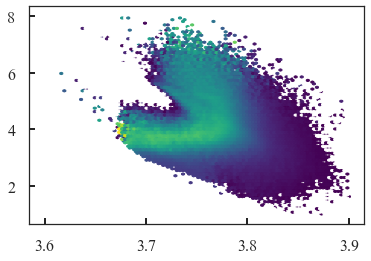

In [419]:
plt.hexbin(lamost['log10_teff'][turnoff(lamost)&(lamost['Z']>-0.8)],
           (lamost_inputs['G']-lamost['dm'])[turnoff(lamost)&(lamost['Z']>-0.8)],
           C=np.power(10.,lamost['log10_age'])[turnoff(lamost)&(lamost['Z']>-0.8)],
           extent=[3.6,3.9,1.,8.],cmap=plt.cm.viridis,vmin=1.,vmax=12.)

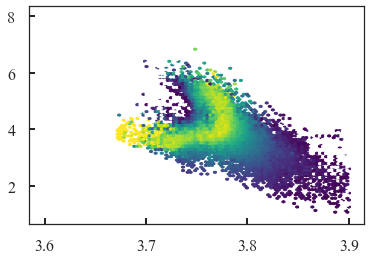

In [416]:
plt.hexbin(segue['log10_teff'][turnoff(segue)&(segue['Z']>-0.8)],
           (segue_inputs['G']-segue['dm'])[turnoff(segue)&(segue['Z']>-0.8)],
           C=np.power(10.,segue['log10_age'])[turnoff(segue)&(segue['Z']>-0.8)],
           extent=[3.6,3.9,1.,8.],cmap=plt.cm.viridis,vmin=1.,vmax=12.)

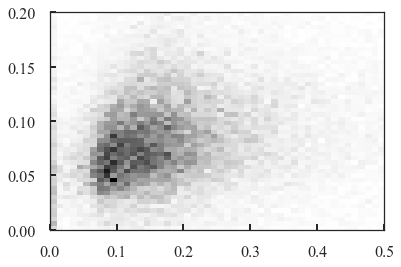

In [440]:
plt.hist2d(3.*segue['log10_age_err'][turnoff(segue)&(segue['Z']>-0.8)],
        3.*segue_inputs['e_fe_h'][turnoff(segue)&(segue['Z']>-0.8)],range=[[0.,0.5],[0.,0.2]],bins=50);

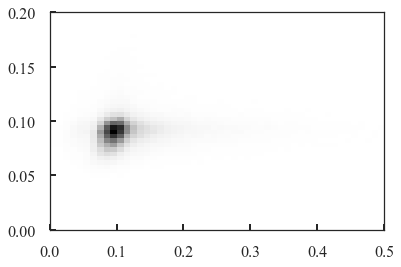

In [438]:
plt.hist2d(galah['log10_age_err'][turnoff(galah)&(galah['Z']>-0.8)],
        galah_inputs['e_fe_h'][turnoff(galah)&(galah['Z']>-0.8)],range=[[0.,0.5],[0.,0.2]],bins=50);

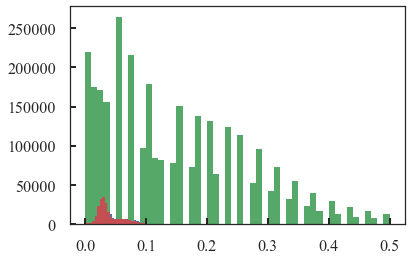

In [460]:
plt.hist(apogee_inputs['e_fe_h'],bins=50,range=[0.,.2]);
plt.hist(lamost_inputs['e_fe_h'],bins=50,range=[0.,.5]);
plt.hist(apogee['Z_err'],bins=50,range=[0.,.2]);

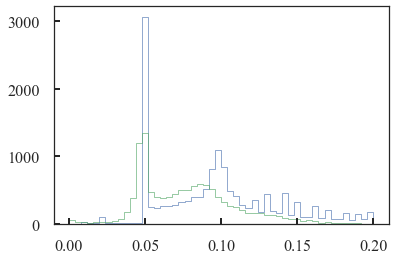

In [466]:
plt.hist(ges_inputs['e_fe_h'],bins=50,range=[0.,.2],histtype='step');
plt.hist(ges['Z_err'],bins=50,range=[0.,.2],histtype='step');

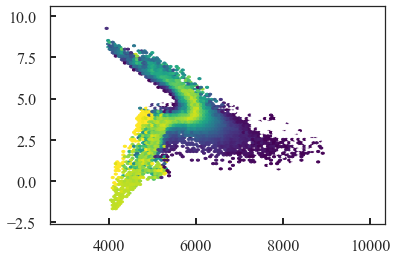

In [455]:
plt.hexbin(np.power(10.,segue['log10_teff'][(segue['Z']>-0.8)]),
           (segue_inputs['G']-segue['dm'])[(segue['Z']>-0.8)],
           C=np.power(10.,segue['log10_age'])[(segue['Z']>-0.8)],
           extent=[3000.,10000.,-2.,10.],cmap=plt.cm.viridis,vmin=1.,vmax=12.)

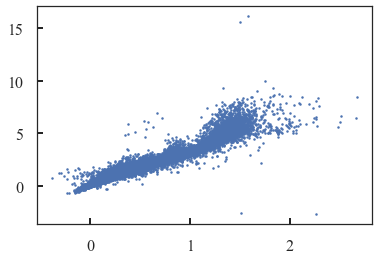

In [14]:
plt.plot((rave_inputs['J']-rave_inputs['K'])[rave['flag']==0],
         (rave_inputs['G']-rave_inputs['K'])[rave['flag']==0],'.',ms=5)
# plt.plot((rave_inputs['J']-rave_inputs['K'])[rave['flag']==1],
#          (rave_inputs['G']-rave_inputs['K'])[rave['flag']==1],'.',ms=5)
# plt.plot(apogee_inputs['J']-apogee_inputs['K'],apogee_inputs['G']-apogee_inputs['K'],'.',ms=5)
# plt.plot(galah_inputs['J']-galah_inputs['K'],galah_inputs['G']-galah_inputs['K'],'.',ms=5)

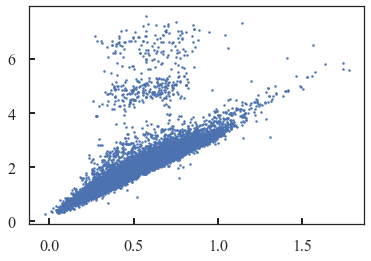

In [19]:
plt.plot((lamost_inputs['J']-lamost_inputs['K'])[lamost['flag']==6],
         (lamost_inputs['G']-lamost_inputs['K'])[lamost['flag']==6],'.',ms=5)

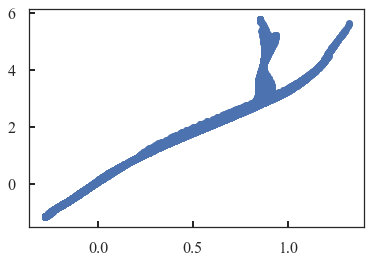

In [21]:
plt.plot(gJ.T[8]-gJ.T[10],g.T[8]-gJ.T[10],'.')


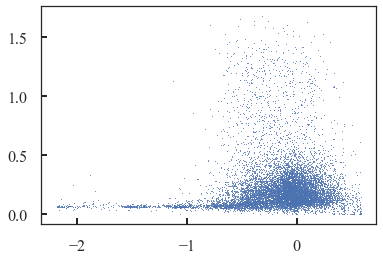

In [47]:
plt.plot(ges['Z'],ges['log10_age_err'],'.',ms=2)

In [ ]:
plt.hist2d(raveON_inputs['e_fe_h'][giants(raveON)&(raveON['Z']<-0.7)],
         raveON['log10_age_err'][giants(raveON)&(raveON['Z']<-0.7)],range=[[0.,0.2],[0.,0.4]],bins=50)
# plt.xlim(-1.,0.6)
plt.ylim(0.,0.4)
# plt.xlim(0.,150.)

(0.0, 0.8)

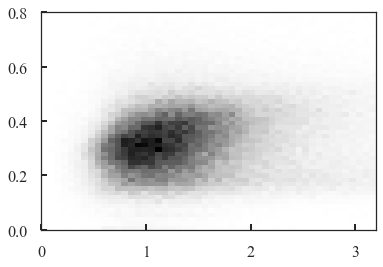

In [134]:
plt.hist2d(raveON['s'][giants(raveON)&(raveON['Z']>-0.7)],
         raveON['log10_age_err'][giants(raveON)&(raveON['Z']>-0.7)]*np.log(10.),range=[[0.,3.2],[0.,0.8]],bins=50)
# plt.xlim(-1.,0.6)
plt.ylim(0.,0.8)
# plt.xlim(0.,150.)

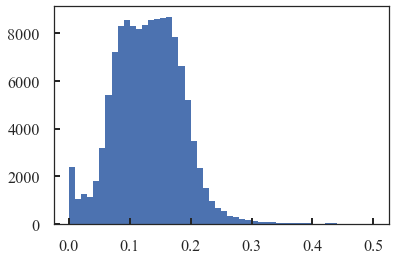

In [99]:
plt.hist(rave['log10_age_err'][giants(rave)&(rave['Z']>-0.3)],range=[0.,0.5],bins=50);

In [60]:
len(np.unique(rave['raveid'])), len(rave)

(457555, 457555)

In [61]:
len(np.unique(apogee['APOGEE_ID'])), len(apogee)

(258475, 258475)

In [62]:
len(np.unique(lamost['obsid'])), len(lamost)

(3177995, 3177995)

(-4.0, 4.0)

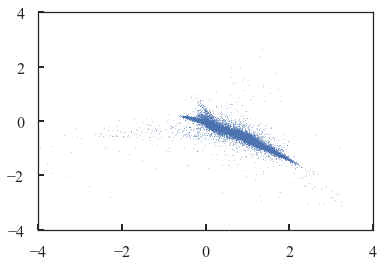

In [76]:
plt.plot(segue_inputs['g']-segue_inputs['i'],segue_inputs['G']-segue_inputs['g'],'.',ms=1)
plt.xlim(-4.,4.)
plt.ylim(-4.,4.)

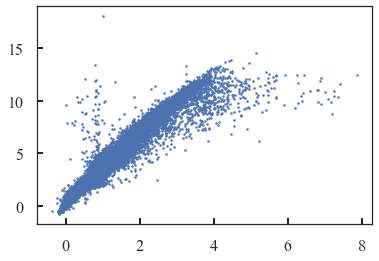

In [71]:
plt.plot(apogee_inputs['J']-apogee_inputs['K'],apogee_inputs['G']-apogee_inputs['K'],'.',ms=5)
# plt.xlim(-4.,4.)
# plt.ylim(-4.,4.)

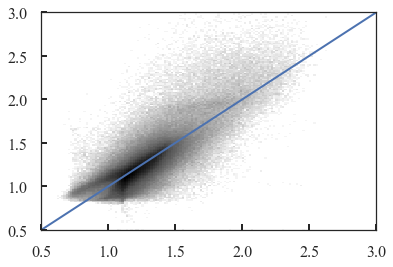

In [143]:
plt.hist2d(jointinputs['mass'],joint['mass'],range=[[0.5,3.],[0.5,3.]],bins=150,norm=LogNorm());
xx = np.linspace(0.5,3.)
plt.plot(xx,xx)

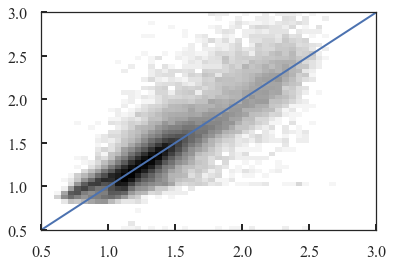

In [146]:
plt.hist2d(apogee_inputs['mass'],apogee['mass'],range=[[0.5,3.],[0.5,3.]],bins=50,norm=LogNorm());
xx = np.linspace(0.5,3.)
plt.plot(xx,xx)

[]

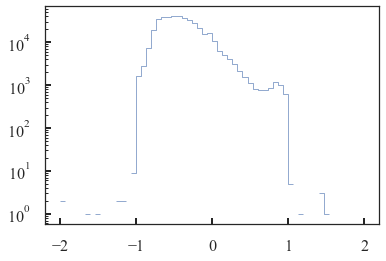

In [175]:
plt.hist(rave['log10age_Z_corr'][rave['flag']==0],
         range=[-2.,2.],histtype='step',bins=60);
plt.semilogy()

In [233]:
rfill = Table.read('/data/jls/GaiaDR2/spectro/LAMOST_distances_pm__withPRIOR.hdf5')

[]

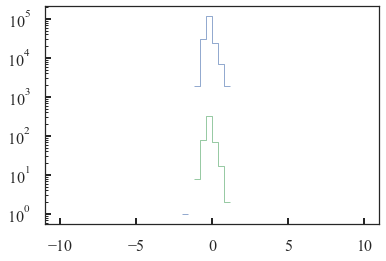

In [214]:
plt.hist(rfill['log10age_Z_corr'][rfill['flag']==0],range=[-10.,10.],bins=50,histtype='step');
plt.hist(rfill2['log10age_Z_corr'][rfill2['flag']==0],range=[-10.,10.],bins=50,histtype='step');
plt.semilogy()

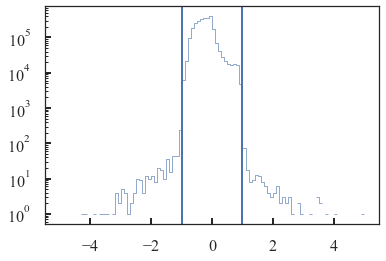

In [235]:
plt.hist(lamost['log10age_Z_corr'][lamost['flag']==0],range=[-5.,5.],bins=100,histtype='step');
plt.semilogy()
plt.axvline(1.)
plt.axvline(-1.)